In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sqlite3

In [2]:
os.chdir(r'../Data')

In [3]:
conn=sqlite3.connect('./database.sqlite')

In [4]:
print(pd.read_sql_query('select * from artists',conn).head())
# print(pd.read_sql_query('select * from artists',conn).columns.values)
print(pd.read_sql_query('select * from artists',conn).columns)

   reviewid          artist
0     22703  massive attack
1     22721        krallice
2     22659    uranium club
3     22661         kleenex
4     22661         liliput
Index(['reviewid', 'artist'], dtype='object')


In [5]:
pd.read_sql_query('select * from content',conn).head()

reviewid                                            content
0     22703  “Trip-hop” eventually became a ’90s punchline,...
1     22721  Eight years, five albums, and two EPs in, the ...
2     22659  Minneapolis’ Uranium Club seem to revel in bei...
3     22661  Kleenex began with a crash. It transpired one ...
4     22725  It is impossible to consider a given release b...

In [6]:
pd.read_sql_query('select * from genres',conn).head()

reviewid       genre
0     22703  electronic
1     22721       metal
2     22659        rock
3     22661        rock
4     22725  electronic

In [7]:
pd.read_sql_query('select * from labels',conn).head()

reviewid               label
0     22703              virgin
1     22721           hathenter
2     22659        static shock
3     22659  fashionable idiots
4     22661     kill rock stars

In [12]:
reviews=pd.read_sql_query('select * from reviews',conn)
reviews.head()

reviewid                 title            artist  \
0     22703             mezzanine    massive attack   
1     22721          prelapsarian          krallice   
2     22659  all of them naturals      uranium club   
3     22661           first songs  kleenex, liliput   
4     22725             new start              taso   

                                                 url  score  best_new_music  \
0  http://pitchfork.com/reviews/albums/22703-mezz...    9.3               0   
1  http://pitchfork.com/reviews/albums/22721-prel...    7.9               0   
2  http://pitchfork.com/reviews/albums/22659-all-...    7.3               0   
3  http://pitchfork.com/reviews/albums/22661-firs...    9.0               1   
4  http://pitchfork.com/reviews/albums/22725-new-...    8.1               0   

           author               author_type    pub_date  pub_weekday  pub_day  \
0     nate patrin               contributor  2017-01-08            6        8   
1        zoe camp               contributor  2017-01-07            5        7   
2  david glickman               contributor  2017-01-07            5        7   
3      jenn pelly  associate reviews editor  2017-01-06            4        6   
4    kevin lozano        tracks coordinator  2017-01-06            4        6   

   pub_month  pub_year  
0          1      2017  
1          1      2017  
2          1      2017  
3          1      2017  
4          1      2017

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 13 columns):
reviewid          18393 non-null int64
title             18393 non-null object
artist            18393 non-null object
url               18393 non-null object
score             18393 non-null float64
best_new_music    18393 non-null int64
author            18393 non-null object
author_type       14487 non-null object
pub_date          18393 non-null object
pub_weekday       18393 non-null int64
pub_day           18393 non-null int64
pub_month         18393 non-null int64
pub_year          18393 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 1.8+ MB


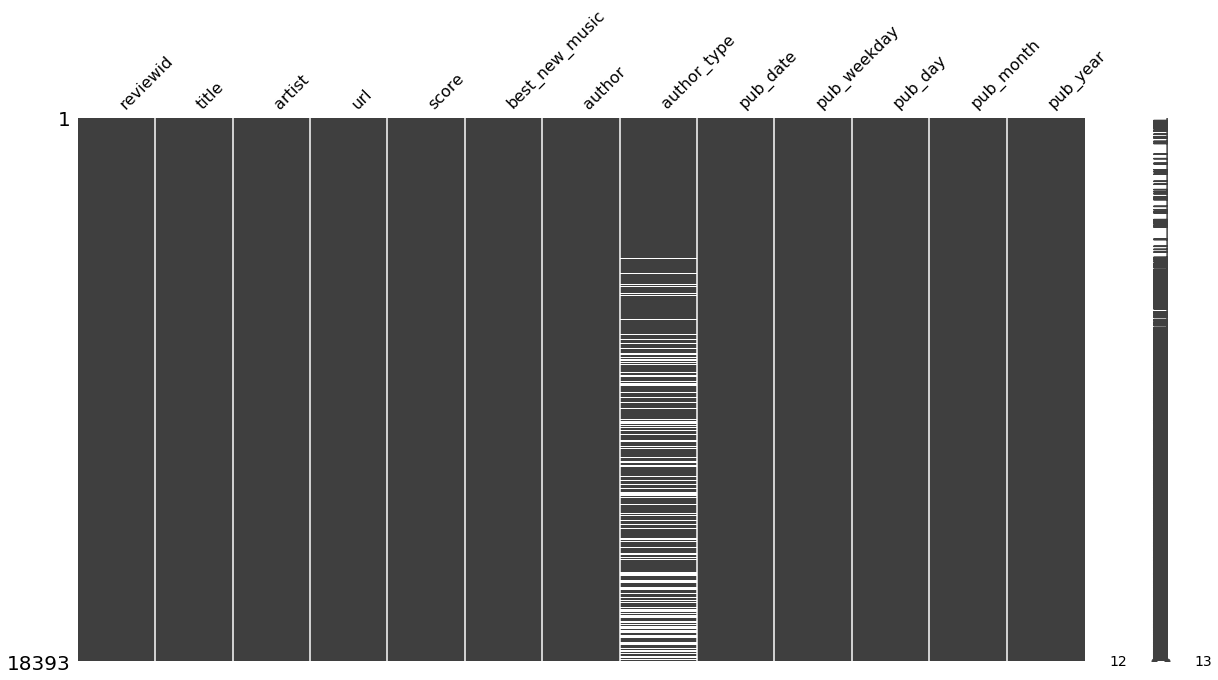

In [14]:
import missingno
missingno.matrix(reviews,figsize=(20,10))

In [16]:
reviews['best_new_music'].value_counts()

0    17450
1      943
Name: best_new_music, dtype: int64

In [10]:
pd.read_sql_query('select * from years',conn).head()

reviewid    year
0     22703  1998.0
1     22721  2016.0
2     22659  2016.0
3     22661  2016.0
4     22725  2016.0

In [41]:
df=pd.read_sql_query("select r.*,g.genre,l.label from reviews r left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid",conn)
df.head()

reviewid                 title            artist  \
0     22703             mezzanine    massive attack   
1     22721          prelapsarian          krallice   
2     22659  all of them naturals      uranium club   
3     22659  all of them naturals      uranium club   
4     22661           first songs  kleenex, liliput   

                                                 url  score  best_new_music  \
0  http://pitchfork.com/reviews/albums/22703-mezz...    9.3               0   
1  http://pitchfork.com/reviews/albums/22721-prel...    7.9               0   
2  http://pitchfork.com/reviews/albums/22659-all-...    7.3               0   
3  http://pitchfork.com/reviews/albums/22659-all-...    7.3               0   
4  http://pitchfork.com/reviews/albums/22661-firs...    9.0               1   

           author               author_type    pub_date  pub_weekday  pub_day  \
0     nate patrin               contributor  2017-01-08            6        8   
1        zoe camp               contributor  2017-01-07            5        7   
2  david glickman               contributor  2017-01-07            5        7   
3  david glickman               contributor  2017-01-07            5        7   
4      jenn pelly  associate reviews editor  2017-01-06            4        6   

   pub_month  pub_year       genre               label  
0          1      2017  electronic              virgin  
1          1      2017       metal           hathenter  
2          1      2017        rock  fashionable idiots  
3          1      2017        rock        static shock  
4          1      2017        rock     kill rock stars

In [42]:
#df=pd.read_sql_query("select r.reviewid,r.title,r.artist,r.url,r.score,r.best_new_music,r.author,r.author_type,r.pub_date,r.pub_weekday,r.pub_day,r.pub_month,r.pub_year,y.year from reviews r left join years y on r.reviewid=y.reviewid left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid left join content c on r.reviewid=c.reviewid",conn)
#df.head()

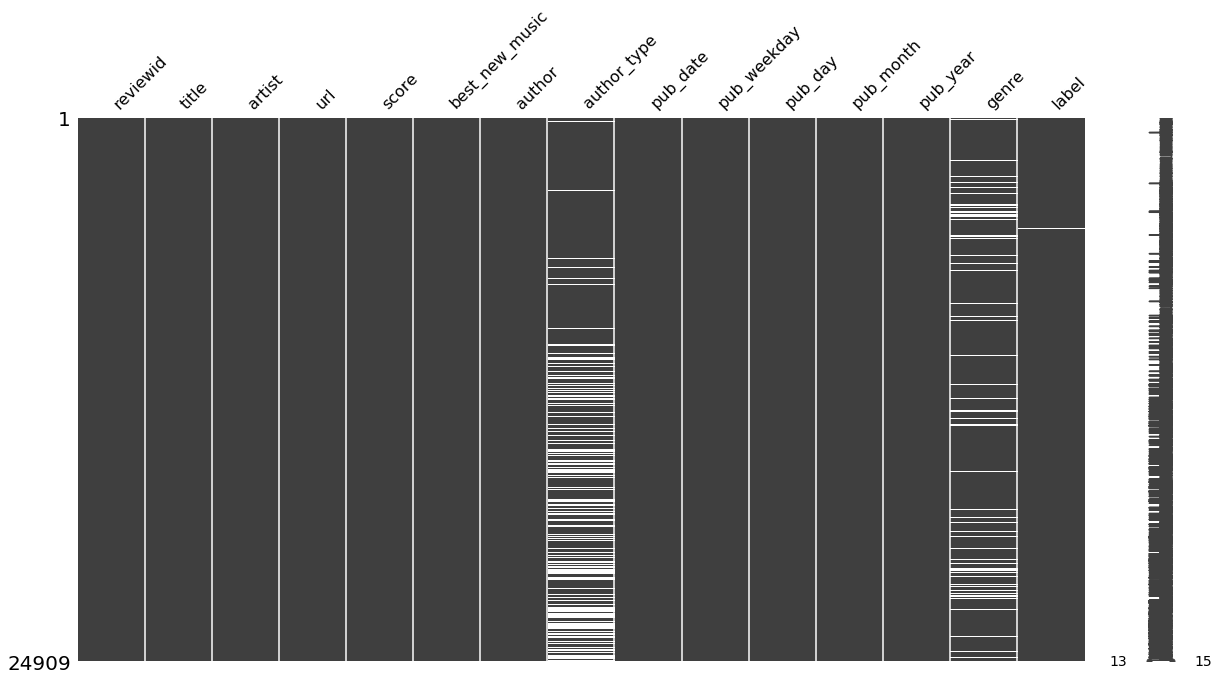

In [43]:
import missingno
missingno.matrix(df,figsize=(20,10))

In [44]:
df.isnull().sum()

reviewid             0
title                0
artist               0
url                  0
score                0
best_new_music       0
author               0
author_type       5422
pub_date             0
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
genre             2553
label               40
dtype: int64

In [45]:
df=df.drop(['reviewid','title','url','pub_date'],axis=1)

In [46]:
df.head()

artist  score  best_new_music          author  \
0    massive attack    9.3               0     nate patrin   
1          krallice    7.9               0        zoe camp   
2      uranium club    7.3               0  david glickman   
3      uranium club    7.3               0  david glickman   
4  kleenex, liliput    9.0               1      jenn pelly   

                author_type  pub_weekday  pub_day  pub_month  pub_year  \
0               contributor            6        8          1      2017   
1               contributor            5        7          1      2017   
2               contributor            5        7          1      2017   
3               contributor            5        7          1      2017   
4  associate reviews editor            4        6          1      2017   

        genre               label  
0  electronic              virgin  
1       metal           hathenter  
2        rock  fashionable idiots  
3        rock        static shock  
4        rock     kill rock stars

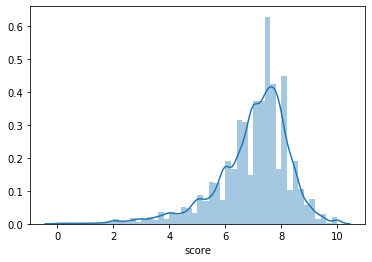

In [47]:
sns.distplot(df['score'])

In [34]:
sns.countplot(df['artist'])

ValueError: 
joey bada$$
         ^
Expected end of text, found '$'  (at char 9), (line:1, col:10)

<Figure size 432x288 with 1 Axes>

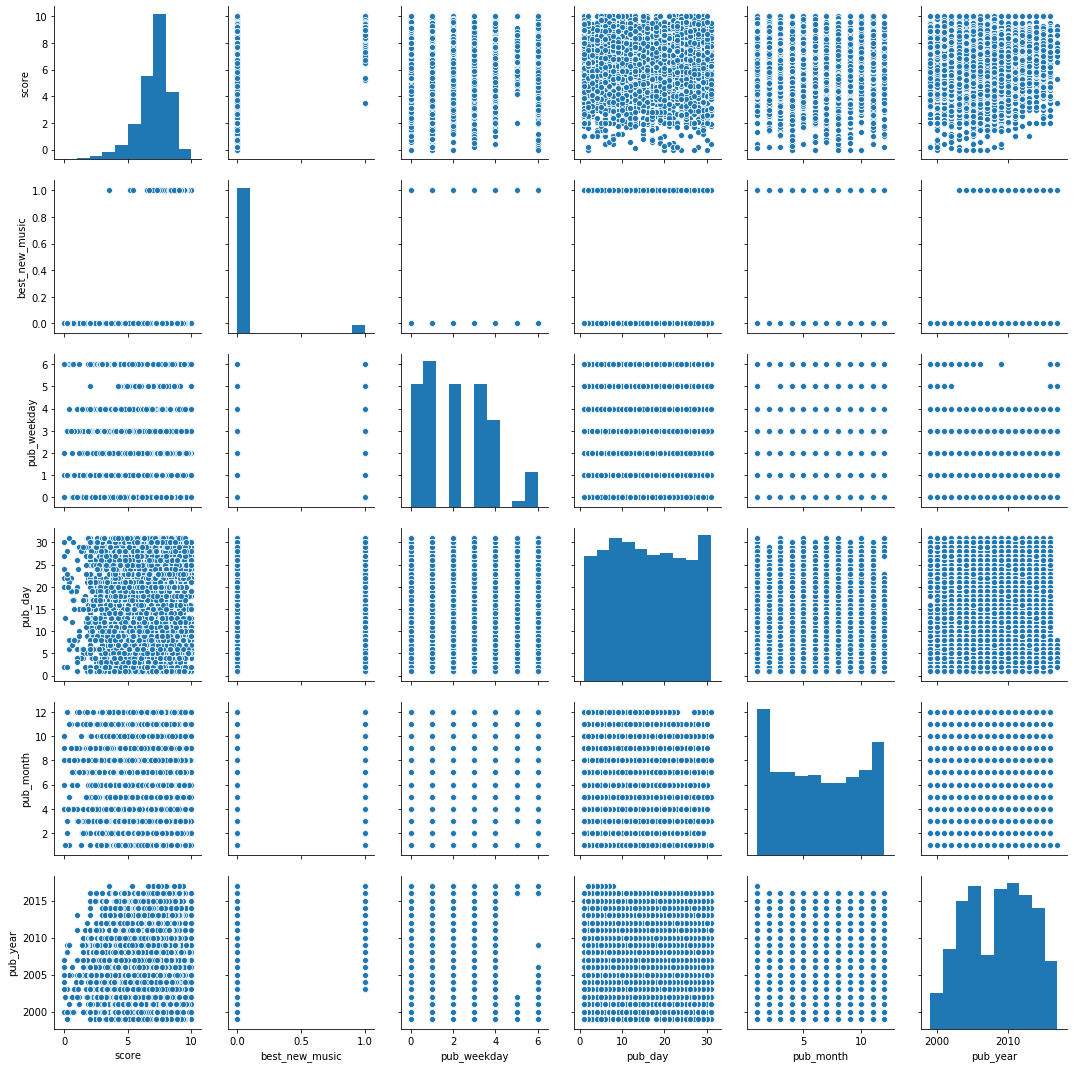

In [35]:
sns.pairplot(df)

In [36]:
df['author_type'].value_counts()

contributor                  16710
senior editor                  669
executive editor               655
senior staff writer            625
contributing editor            237
editor-in-chief                133
deputy news editor             129
associate staff writer         120
associate reviews editor        56
tracks coordinator              55
associate editor                54
assistant editor                19
associate features editor       17
news director                    5
managing editor                  3
Name: author_type, dtype: int64

In [40]:
pd.crosstab(df['author'],df['genre'])

genre              electronic  experimental  folk/country  global  jazz  \
author                                                                    
aaron leitko               13            29             3       2     5   
abby garnett                3             0             0       0     0   
abigail covington           0             0             0       0     0   
abigail garnett             4             0             0       0     0   
adam dlugacz                0             0             0       0     0   
...                       ...           ...           ...     ...   ...   
zach hammerman              0             0             0       0     0   
zach hooker                13             4             0       0     6   
zach kelly                 57             9             0       1     0   
zach vowell                 0             0             0       0     0   
zoe camp                    4             8             1       0     1   

genre              metal  pop/r&b  rap  rock  
author                                        
aaron leitko           6        1    1    55  
abby garnett           0        1    0     0  
abigail covington      0        0    2     0  
abigail garnett        0        0    0     0  
adam dlugacz           1        0    0     1  
...                  ...      ...  ...   ...  
zach hammerman         0        1    0     0  
zach hooker            0        3    0    24  
zach kelly             3       20   14    83  
zach vowell            0        1    0     0  
zoe camp              23        1    3    41  

[426 rows x 9 columns]

Empty DataFrame
Columns: [artist, score, best_new_music, author, author_type, pub_weekday, pub_day, pub_month, pub_year, genre, label]
Index: []

In [52]:
df['author_type']=df['author_type'].fillna('contributor')

In [53]:
df.isnull().sum()

artist               0
score                0
best_new_music       0
author               0
author_type          0
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
genre             2553
label               40
dtype: int64

In [55]:
pd.crosstab(df['genre'],df['author'])

author        aaron leitko  abby garnett  abigail covington  abigail garnett  \
genre                                                                          
electronic              13             3                  0                4   
experimental            29             0                  0                0   
folk/country             3             0                  0                0   
global                   2             0                  0                0   
jazz                     5             0                  0                0   
metal                    6             0                  0                0   
pop/r&b                  1             1                  0                0   
rap                      1             0                  2                0   
rock                    55             0                  0                0   

author        adam dlugacz  adam moerder  adam ohler  al shipley  alan light  \
genre                                                                          
electronic               0            67           0           1           0   
experimental             0            28           0           1           0   
folk/country             0             8           0           0           0   
global                   0             0           0           0           0   
jazz                     0             1           0           2           0   
metal                    1             6           0           0           0   
pop/r&b                  0            14           0           1           3   
rap                      0             0           0           0           0   
rock                     1           171           2           6           2   

author        alan smithee  ...  william bowers  william morris  \
genre                       ...                                   
electronic               0  ...              19               5   
experimental             0  ...               6               2   
folk/country             0  ...               6               1   
global                   0  ...               0               0   
jazz                     0  ...               0               0   
metal                    0  ...               5               0   
pop/r&b                  0  ...               3               1   
rap                      0  ...               2               0   
rock                     1  ...             104              29   

author        winston cook-wilson  yancey strickler  zach baron  \
genre                                                             
electronic                      6                 0          10   
experimental                   10                 0          25   
folk/country                    3                 0           3   
global                          0                 0           0   
jazz                            0                 0           1   
metal                           0                 0          25   
pop/r&b                         1                 0           4   
rap                            19                 0           4   
rock                           13                 2          65   

author        zach hammerman  zach hooker  zach kelly  zach vowell  zoe camp  
genre                                                                         
electronic                 0           13          57            0         4  
experimental               0            4           9            0         8  
folk/country               0            0           0            0         1  
global                     0            0           1            0         0  
jazz                       0            6           0            0         1  
metal                      0            0           3            0        23  
pop/r&b                    1            3          20            1         1  
rap                        0            0          

In [56]:
df[df['genre'].isnull()]

artist  score  best_new_music              author  \
7          various artists    7.4               0  vanessa okoth-obbo   
18         various artists    6.6               0      louis pattison   
48         jess williamson    7.7               0     benjamin scheim   
51                     adr    7.1               0        thea ballard   
66         various artists    4.8               0       jayson greene   
...                    ...    ...             ...                 ...   
24748           soundtrack    4.9               0         sarah zupko   
24754  the vandermark five    7.4               0         chip chanko   
24865          songs: ohia    8.0               0     taylor m. clark   
24886              the the    7.6               0     michael sandlin   
24908       neil hamburger    6.5               0      jason josephes   

         author_type  pub_weekday  pub_day  pub_month  pub_year genre  \
7        contributor            3        5          1      2017  None   
18       contributor            0        2          1      2017  None   
48       contributor            5       17         12      2016  None   
51       contributor            5       17         12      2016  None   
66     senior editor            5       10         12      2016  None   
...              ...          ...      ...        ...       ...   ...   
24748    contributor            1       15          6      1999  None   
24754    contributor            1        8          6      1999  None   
24865    contributor            0       15          3      1999  None   
24886    contributor            1       23          2      1999  None   
24908    contributor            1        5          1      1999  None   

                   label  
7                    rca  
18             soul jazz  
48         brutal honest  
51                   pan  
66              atlantic  
...                  ...  
24748                tvt  
24754          atavistic  
24865  secretly canadian  
24886                4ad  
24908          drag city  

[2553 rows x 11 columns]

In [57]:
df[df['artist']=='jess williamson']

artist  score  best_new_music           author  author_type  \
48    jess williamson    7.7               0  benjamin scheim  contributor   
4288  jess williamson    7.4               0   lindsay zoladz  contributor   

      pub_weekday  pub_day  pub_month  pub_year genre          label  
48              5       17         12      2016  None  brutal honest  
4288            3       30          1      2014  None  brutal honest

In [58]:
pd.crosstab(df['author'],df['genre'])

genre              electronic  experimental  folk/country  global  jazz  \
author                                                                    
aaron leitko               13            29             3       2     5   
abby garnett                3             0             0       0     0   
abigail covington           0             0             0       0     0   
abigail garnett             4             0             0       0     0   
adam dlugacz                0             0             0       0     0   
...                       ...           ...           ...     ...   ...   
zach hammerman              0             0             0       0     0   
zach hooker                13             4             0       0     6   
zach kelly                 57             9             0       1     0   
zach vowell                 0             0             0       0     0   
zoe camp                    4             8             1       0     1   

genre              metal  pop/r&b  rap  rock  
author                                        
aaron leitko           6        1    1    55  
abby garnett           0        1    0     0  
abigail covington      0        0    2     0  
abigail garnett        0        0    0     0  
adam dlugacz           1        0    0     1  
...                  ...      ...  ...   ...  
zach hammerman         0        1    0     0  
zach hooker            0        3    0    24  
zach kelly             3       20   14    83  
zach vowell            0        1    0     0  
zoe camp              23        1    3    41  

[426 rows x 9 columns]

In [59]:
df[df['author']=='vanessa okoth-obbo']

artist  score  best_new_music              author  author_type  \
7    various artists    7.4               0  vanessa okoth-obbo  contributor   
53       jessy lanza    6.5               0  vanessa okoth-obbo  contributor   
193      alicia keys    6.5               0  vanessa okoth-obbo  contributor   
265             jojo    7.0               0  vanessa okoth-obbo  contributor   
313            lizzo    6.1               0  vanessa okoth-obbo  contributor   
314            lizzo    6.1               0  vanessa okoth-obbo  contributor   
570  various artists    6.2               0  vanessa okoth-obbo  contributor   
653          jeremih    7.8               0  vanessa okoth-obbo  contributor   

     pub_weekday  pub_day  pub_month  pub_year    genre          label  
7              3        5          1      2017     None            rca  
53             4       16         12      2016  pop/r&b       hyperdub  
193            3       10         11      2016  pop/r&b            rca  
265            3       27         10      2016  pop/r&b       atlantic  
313            5       15         10      2016      rap       atlantic  
314            5       15         10      2016      rap      nice life  
570            1       16          8      2016     None            rca  
653            3       28          7      2016  pop/r&b  self-released

In [60]:
df.groupby(['artist','author'])['genre'].count()

artist          author              
                grayson haver currin    0
                ian cohen               0
!!!             brian howe              3
                cameron cook            1
                larry fitzmaurice       1
                                       ..
zu              mia clarke              1
zulu winter     laura snapes            2
zwan            ryan schreiber          0
zzzz            brian howe              1
{{{ sunset }}}  nate patrin             0
Name: genre, Length: 15606, dtype: int64

In [63]:
df['genre'].replace({np.nan:'pop/r&b'})

0          electronic
1               metal
2                rock
3                rock
4                rock
             ...     
24904            rock
24905    experimental
24906           metal
24907            rock
24908         pop/r&b
Name: genre, Length: 24909, dtype: object

In [68]:
df[df['author']=='vanessa okoth-obbo'].fillna('pop/r&b')

artist  score  best_new_music              author  author_type  \
7    various artists    7.4               0  vanessa okoth-obbo  contributor   
53       jessy lanza    6.5               0  vanessa okoth-obbo  contributor   
193      alicia keys    6.5               0  vanessa okoth-obbo  contributor   
265             jojo    7.0               0  vanessa okoth-obbo  contributor   
313            lizzo    6.1               0  vanessa okoth-obbo  contributor   
314            lizzo    6.1               0  vanessa okoth-obbo  contributor   
570  various artists    6.2               0  vanessa okoth-obbo  contributor   
653          jeremih    7.8               0  vanessa okoth-obbo  contributor   

     pub_weekday  pub_day  pub_month  pub_year    genre          label  
7              3        5          1      2017  pop/r&b            rca  
53             4       16         12      2016  pop/r&b       hyperdub  
193            3       10         11      2016  pop/r&b            rca  
265            3       27         10      2016  pop/r&b       atlantic  
313            5       15         10      2016      rap       atlantic  
314            5       15         10      2016      rap      nice life  
570            1       16          8      2016  pop/r&b            rca  
653            3       28          7      2016  pop/r&b  self-released

In [67]:
for i in df['author'].values:
    print(i,df[df['author']==i]['genre'].value_counts())

nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
zoe camp rock            41
metal           23
experimental     8
electronic       4
rap              3
jazz             1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
david glickman rock          3
electronic    2
Name: genre, dtype: int64
david glickman rock          3
electronic    2
Name: genre, dtype: int64
jenn pelly rock            29
experimental     9
electronic       6
pop/r&b          2
folk/country     2
global           1
Name: genre, dtype: int64
jenn pelly rock            29
experimental     9
electronic       6
pop/r&b          2
folk/country     2
global           1
Name: genre, dtype: int64
kevin lozano electronic      19
experimental    14
pop/r&b          6
rock             5
rap              3
global           2
jazz             1
N

ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
sheldon pearce rap             59
pop/r&b          3
folk/country     1
electronic       1
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
cameron cook electronic      14
rock            14
pop/r&b          9
experimental     1
Name: genre, dtype: int64
cameron cook electronic      14
rock            14
pop/r&b          9
experimental     1
Name: genre, dtype: int64
andy beta electronic      100
rock             

andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
jes skolnik rock            17
metal            1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
miles raymer electronic      38
rap             22
rock            20
pop/r&b         14
metal            3
experimental     3
global           3
Name: genre, dtype: int64
saby reyes-kulkarni metal           21
rock            17
experimental     7
electronic       5
pop/r&b          2
rap              2
jazz             1
global           1
Name: genre, dtype: int64
nina mashurova rock            4
experimental    1
Name: genre, dtype: int64
nina mashurova rock            4
experimental    1
Name: genre, dtype: int64
dorian lynskey rock    1
Name: genre, dtype: int64
rebecca haithcoat pop/r&b       4
rap           4
electronic    2
Name: genre, dtype: int64
louis pattison electron

matthew grosinger electronic    1
rock          1
Name: genre, dtype: int64
edwin stats houghton rap    2
Name: genre, dtype: int64
edwin stats houghton rap    2
Name: genre, dtype: int64
matthew grosinger electronic    1
rock          1
Name: genre, dtype: int64
mehan jayasuriya rap             13
electronic       9
rock             5
pop/r&b          4
experimental     1
Name: genre, dtype: int64
saby reyes-kulkarni metal           21
rock            17
experimental     7
electronic       5
pop/r&b          2
rap              2
jazz             1
global           1
Name: genre, dtype: int64
nina mashurova rock            4
experimental    1
Name: genre, dtype: int64
nina mashurova rock            4
experimental    1
Name: genre, dtype: int64
nina mashurova rock            4
experimental    1
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
stephe

quinn moreland rock       16
pop/r&b     3
Name: genre, dtype: int64
katherine st. asaph rock            26
pop/r&b         22
electronic      21
experimental     3
rap              2
Name: genre, dtype: int64
louis pattison electronic      13
experimental     2
rock             2
global           1
folk/country     1
Name: genre, dtype: int64
laura snapes rock            76
pop/r&b         24
electronic      16
folk/country     7
experimental     3
Name: genre, dtype: int64
marcus j. moore pop/r&b         17
rap             14
jazz             8
electronic       6
folk/country     3
rock             2
experimental     1
Name: genre, dtype: int64
marcus j. moore pop/r&b         17
rap             14
jazz             8
electronic       6
folk/country     3
rock             2
experimental     1
Name: genre, dtype: int64
paul a. thompson rap    21
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
globa

sam sodomsky rock            12
folk/country    10
metal            4
Name: genre, dtype: int64
saby reyes-kulkarni metal           21
rock            17
experimental     7
electronic       5
pop/r&b          2
rap              2
jazz             1
global           1
Name: genre, dtype: int64
chris randle experimental    1
electronic      1
rock            1
Name: genre, dtype: int64
erin macleod global    5
rap       1
Name: genre, dtype: int64
rebecca haithcoat pop/r&b       4
rap           4
electronic    2
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
paul a. thompson rap    21
Name: genre, dtype: int64
stephen thomas erlewine rock            10
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global

stephen thomas erlewine rock            10
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
pat healy rock    18
Name: genre, dtype: int64
jenn pelly rock            29
experimental     9
electronic       6
pop/r&b          2
folk/country     2
global           1
Name: genre, dtype: int64
cameron cook electronic      14
rock            14
pop/r&b          9
experimental     1
Name: genre, dtype: int64
cameron cook electronic      14
rock            14
pop/r&b          9
experimental     1
Name: genre, dtype: int64
kevin lozano electronic      19
experimental    14
pop/r&b          6
rock             5
rap              3
global           2
jazz             1
Name: genre, dtype: int64
kevin lozano electronic      19
experimental    14
pop/r&b          6
rock             5
rap 

benjamin scheim rock            12
experimental     9
electronic       5
pop/r&b          1
rap              1
folk/country     1
Name: genre, dtype: int64
zoe camp rock            41
metal           23
experimental     8
electronic       4
rap              3
jazz             1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
zoe camp rock            41
metal           23
experimental     8
electronic       4
rap              3
jazz             1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
sheldon pearce rap             59
pop/r&b          3
folk/country     1
electronic       1
Name: genre, dtype: int64
evan rytlewski rock            44
pop/r&b          7
rap              5
electronic       4
folk/country     3
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
b

marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
kris ex rap        11
pop/r&b     3
Name: genre, dtype: int64
sheldon pearce rap             59
pop/r&b          3
folk/country     1
electronic       1
Name: genre, dtype: int64
erin macleod global    5
rap       1
Name: genre, dtype: int64
brad nelson rock          15
pop/r&b       10
jazz           2
electronic     2
metal          1
Name: genre, dtype: int64
brad nelson rock          15
pop/r&b       10
jazz           2
electronic     2
metal          1
Name: genre, dtype: int64
benjamin scheim rock            12
experimental     9
electronic       5
pop/r&b          1
rap              1
folk/country     1
Name: genre, dtype: int64
kevin lozano electronic      19
experimental    14
pop/r&b          6
rock             5
rap              3
global           2
jazz             1
Name: genre, dtype: int64
abiga

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
kevin lozano  experimental    1
Name: genre, dtype: int64
cameron cook electronic      14
rock            14
pop/r&b          9
experimental     1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
quinn moreland rock       16
pop/r&b     3
Name: genre, dtype: int64
john s.w. macdonald rock    7
Name: genre, dtype: int64
simon reynolds rock    2
Name: genre, dtype: int64
matthew ramirez rap           31
electronic     2
pop/r&b        1
rock           1
Name: genre, dtype: int64
evan rytlewski rock            44
pop/r&b          7
rap              5
electronic       4
folk/country     3
Name: genre, dt

david drake rap           64
pop/r&b       13
electronic     3
rock           1
Name: genre, dtype: int64
david drake rap           64
pop/r&b       13
electronic     3
rock           1
Name: genre, dtype: int64
benjamin scheim rock            12
experimental     9
electronic       5
pop/r&b          1
rap              1
folk/country     1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
katherine st. asaph rock            26
pop/r&b         22
electronic      21
experimental     3
rap              2
Name: genre, dtype: int64
katherine st. asaph rock            26
pop/r&b         22
electronic      21
experimental     3
rap              2
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
p

cameron cook electronic      14
rock            14
pop/r&b          9
experimental     1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3


andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
katherine st. asaph rock            26
pop/r&b         22
electronic      21
experimental     3
rap              2
Name: genre, dtype: int64
lindsay hood rock    4
Name: genre, dtype: int64
sam sodomsky rock         

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
jazz monroe rock            12
folk/country     5
electronic       3
experimental     2
pop/r&b          2
Name: genre, dtype: int64
jazz monroe rock            12
folk/country     5
electronic       3
experimental     2
pop/r&b          2
Name: genre, dtype: int64
kevin lozano electronic      19
experimental    14
pop/r&b          6
rock             5
rap              3
global           2
jazz             1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
jay balfour rap           21
pop/r&b        4
global         2
electronic     1
Name: genre, dtype: int64
jay balfour rap           21
pop/r

sheldon pearce rap             59
pop/r&b          3
folk/country     1
electronic       1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
quinn moreland rock       16
pop/r&b     3
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
stacey anderson rock          7
electronic    4
pop/r&b       2
rap           2
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap           

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
sheldon pearce rap             59
pop/r&b          3
folk/country     1
electronic       1
Name: genre, dtype: int64
cameron cook electronic      14
rock            14
pop/r&b          9
experimental     1
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2
pop/r&b          1
rap    

philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
estelle tang rock    3
Name: genre, dtype: int64
marcus j. moore pop/r&b         17
rap             14
jazz             8
electronic       6
folk/country     3
rock             2
experimental     1
Name: genre, dtype: int64
saby reyes-kulkarni metal           21
rock            17
experimental     7
electronic       5
pop/r&b          2
rap              2
jazz             1
global           1
Name: genre, dtype: int64
ron hart rock          9
electronic    2
rap           1
jazz          1
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
ernest wilkins rap        6
pop/r&b    3
rock       1
Name: genre, dtype: int64
ernest wilkins rap        6
pop/r&b    3

mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
jes skolnik rock            17
metal            1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
minna zhou global        5
electronic    3
pop/r&b       2
rock          1
Name: genre, dtype: int64
paul a. thompson rap    21
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Nam

t. cole rachel rock          26
electronic     7
pop/r&b        1
Name: genre, dtype: int64
zoe camp rock            41
metal           23
experimental     8
electronic       4
rap              3
jazz             1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
miles raymer electronic      38
rap             22
rock            20
pop/r&b         14
metal            3
experimental     3
global           3
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
mosi reeves rap     6
rock    1
Name: genre

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
matthew ramirez rap           31
electronic     2
pop/r&b        1
rock           1
Name: genre, dtype: int64
matthew ramirez rap           31
electronic     2
pop/r&b        1
rock           1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
paul a. thompson rap    21
Name: genre, dtype: int64
paul a. thompson rap    21
Name: genre, dtype: int64
mehan jayasuriya rap             13
electronic       9
rock             5
pop/r&b          4
experimental     1
Name: genre, dtype: int64
seth colter walls experimental    36
jazz            26
rock             8
electronic       4
pop/r&b          

grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
jia tolentino pop/r&b    5
rap        3
rock       1
Name: genre, dtype: int64
brad nelson rock          15
pop/r&b       10
jazz           2
electronic     2
metal          1
Name: genre, dtype: int64
andy o'connor metal           35
rock             7
experimental     4
electronic       2
rap              1
jazz             1
Name: genre, dtype: int64
marcus j. moore pop/r&b         17
rap             14
jazz             8
electronic       6
folk/country     3
rock             2
experimental     1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b      

seth colter walls experimental    36
jazz            26
rock             8
electronic       4
pop/r&b          2
global           2
rap              1
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
jes skolnik rock            17
metal            1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
matthew ramirez rap           31
electronic     2
pop/r&b        1
rock           1
Name: genre, dtype: int64
matthew ramirez rap           31
electronic     2
pop/r&b        1
rock           1
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2


hazel cills rock          11
pop/r&b        6
electronic     5
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
j. edward keyes rock            4
experimental    1
rap             1
electronic      1
Name: genre, dtype: int64
andy o'connor metal           35
rock             7
experimental     4
electronic       2
rap              1
jazz             1
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
gra

anupa mistry pop/r&b       10
rap            4
electronic     3
Name: genre, dtype: int64
anupa mistry pop/r&b       10
rap            4
electronic     3
Name: genre, dtype: int64
zoe camp rock            41
metal           23
experimental     8
electronic       4
rap              3
jazz             1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
zoe camp rock            41
metal           23
experimental     8
electronic       4
rap              3
jazz             1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
ron hart rock          9
electronic    2
rap           1
jazz          1
Name: genre, dtype: int64
ron hart rock          9
electronic    2
rap           1
jazz          1
Name: genre, dtype: int64
mehan jayasuriya rap             13
electronic       9
rock             5
pop/r&b          4
experimental     1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country    

britt julious pop/r&b       5
rap           3
electronic    2
Name: genre, dtype: int64
eric torres pop/r&b       6
electronic    4
rock          3
Name: genre, dtype: int64
jessica hopper rock            8
pop/r&b         5
rap             1
folk/country    1
Name: genre, dtype: int64
max mertens rap     1
rock    1
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
anupa mistry pop/r&b       10
rap            4
electronic     3
Name: genre, dtype: int64
winston cook-wilson rap             19
rock            13
experimental    10
electronic       6
folk/country     3
pop/r&b          1
Name: genre, dtype: int64
anupa mistry pop/r&b     

craig jenkins rap           55
pop/r&b        6
electronic     1
rock           1
Name: genre, dtype: int64
laura snapes rock            76
pop/r&b         24
electronic      16
folk/country     7
experimental     3
Name: genre, dtype: int64
laura snapes rock            76
pop/r&b         24
electronic      16
folk/country     7
experimental     3
Name: genre, dtype: int64
evan rytlewski rock            44
pop/r&b          7
rap              5
electronic       4
folk/country     3
Name: genre, dtype: int64
hazel cills rock          11
pop/r&b        6
electronic     5
Name: genre, dtype: int64
corbin reiff rock    4
Name: genre, dtype: int64
raymond cummings rock            11
experimental     4
Name: genre, dtype: int64
meaghan garvey rap           22
pop/r&b       14
electronic     6
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
m

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
mosi reeves rap     6
rock    1
Name: genre, dtype: int64
cameron cook electronic      14
rock            14
pop/r&b          9
experimental     1
Name: genre, dtype: int64
winston cook-wilson rap             19
rock            13
experimental    10
electronic       6
folk/country     3
pop/r&b          1
Name: genre, dtype: int64
laura snapes rock            76
pop/r&b         24
electronic      16
folk/country     7
experimental     3
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country   

marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz        

andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
abigail garnett electronic    4
Name: genre, dtype: int64
jonathan k. dick metal    2
rock     1
Name: genre, dtype: int64
marcus j. moore pop/r&b         17
rap             14
jazz             8
electronic       6
folk/country     3
rock             2
experimental     1
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
exper

aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2
pop/r&b          1
rap              1
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
miles raymer electronic      38
rap             22
rock            20
pop/r&b         14
metal            3
experimental     3
global           3
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
marcus j. moore pop/r&b         17
rap             14
jazz 

jason heller rock            73
metal           11
experimental     9
electronic       8
folk/country     2
pop/r&b          1
global           1
Name: genre, dtype: int64
jia tolentino pop/r&b    5
rap        3
rock       1
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
david drake rap           64
pop/r&b       13
electronic     3
rock           1
Name: genre, dtype: int64
jamieson cox rock            26
pop/r&b         10
electronic       7
experimental     3
global           2
rap              1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap            

colin joyce electronic      6
rock            6
metal           2
pop/r&b         1
folk/country    1
Name: genre, dtype: int64
david drake rap           64
pop/r&b       13
electronic     3
rock           1
Name: genre, dtype: int64
david drake rap           64
pop/r&b       13
electronic     3
rock           1
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
evan rytlewski rock            44
pop/r&b          7
rap              5
electronic       4
folk/country     3
Name: genre, dtype: int64
minna zhou global        5
electronic    3
pop/r&b       2
rock          1
Name: genre, dtype: int64
joel oliphint rock            7
folk/country    2
experimental    1
rap             1
Name: genre, dtype: int64
jamieson cox rock            26
pop/r&b         10
electronic       7
experimental     3
global           2
rap              1
Name: genre, dtype: i

philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
meaghan garvey rap           22
pop/r&b       14
electronic     6
Name: genre, dtype: int64
hazel cills rock          11
pop/r&b        6
electronic     5
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
winston cook-wilson rap             19
rock            13
experimental    10
electronic       6
folk/country     3
pop/r&b          1
Name: genre, dtype: int64
winston cook-wilson rap             19
rock            13
experi

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
j

evan rytlewski rock            44
pop/r&b          7
rap              5
electronic       4
folk/country     3
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal     

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
t. cole rachel rock          26
electronic     7
pop/r&b        1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b  

andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
andy o'connor metal           35
rock             7
experimental     4
electronic       2
rap              1
jazz             1
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2
pop/r&b          1
rap              1
Name: genre, dtype: int64
jonah bromwich electronic      35
rap             24
pop/r&b         10
rock             5
jazz             1
experimental     1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experiment

nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
jonah bromwich electronic      35
rap             24
pop/r&b         10
rock             5
jazz             1
experimental     1
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
colin joyce electronic      6
rock            6
metal           2
pop/r&b         1
folk/country    1
Name: genre, dtype: int64
renato pagnani pop/r&b       11
rap           11
electronic     1
Name: genre, dtype: int64
renato pagnani pop/r&b       11
rap           11
electronic     1
Name: genre, dt

marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
vish khanna rock    1
Name: genre, dtype: int64
jeff weiss rap           10
rock           5
pop/r&b        3
electronic     2
Name: genre, dtype: int64
corban goble rap             15
pop/r&b          7
electronic       3
folk/country     2
rock             1
Name: genre, dtype: int64
corban goble rap             15
pop/r&b          7
electronic       3
folk/country     2
rock             1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal     

nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
jason heller rock            73
metal           11
experimental     9
electronic       8
folk/country     2
pop/r&b          1
global           1
Name: genre, dtype: int64
andy o'connor metal           35
rock             7
experimental     4
electronic       2
rap              1
jazz             1
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal  

andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
sam hockley-smith rock          6
electronic    4
rap           3
pop/r&b       2
metal         1
Name: genre, dtype: int64
philip sherburne electronic      166
exper

jason heller rock            73
metal           11
experimental     9
electronic       8
folk/country     2
pop/r&b          1
global           1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
carrie battan pop/r&b         11
rap              9
rock             8
electronic       6
experimental     2
Name: genre, dtype: int64
carrie battan pop/r&b         11
rap              9
rock             8
electronic       6
experimental     2
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
fo

colin joyce electronic      6
rock            6
metal           2
pop/r&b         1
folk/country    1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
colin joyce electronic      6
rock            6
metal           2
pop/r&b         1
folk/country    1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int6

craig jenkins rap           55
pop/r&b        6
electronic     1
rock           1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stephen deusner rock            11
folk/country     2
experimental     1
pop/r&b          1
Name: genre, dtype: int64
stephen deusner rock            11
folk/country     2
experimental     1
pop/r&b          1
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
evan minsker rock            78
electronic      13
experimental     3
metal            2
pop/r&b 

lawrence burney pop/r&b    1
rap        1
Name: genre, dtype: int64
stephen deusner rock            11
folk/country     2
experimental     1
pop/r&b          1
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
patric fallon electronic      10
rock             4
experimental     1
pop/r&b          1
Name: genre, dtype: int64
patric fallon electronic      10
rock             4
experimental     1
pop/r&b          1
Name: genre, dtype: int64
jamieson cox rock            26
pop/r&b         10
e

craig jenkins rap           55
pop/r&b        6
electronic     1
rock           1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz             1
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz             1
Name: genre, dtype: int64
jason heller rock            73
metal           11
experimental     9
electronic       8
folk/country     2
pop/r&b          1
global           1
Name: genre, dtype: int64
jonah bromwich electronic      35
rap             24
pop/r&b         10
rock             5
jazz             1
experimental

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
jamieson cox rock            26
pop/r&b         10
electronic       7
experimental     3
global           2
rap              1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
jason heller rock            73
metal           11
experimental     9
electronic       8
folk/country     2
pop/r&b          1
global           1
Name: genre, dtype: int64
jason heller rock            73
metal           11
experimental     9
electron

paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
jason heller rock            73
metal           11
experimental     9
electronic       8
folk/country     2
pop/r&b          1
global           1
Name: genre, d

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
miles raymer electronic      38
rap             22
rock            20
pop/r&b         14
metal            3
experimental     3
global           3
Name: genre, dtype: int64
miles raymer electronic      38
rap             22
rock            20
pop/r&b         14
metal            3
experimental     3
global           3
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
zoe camp rock            41

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country

mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2

jordan sargent rap           63
pop/r&b       10
electronic     8
rock           7
Name: genre, dtype: int64
jordan sargent rap           63
pop/r&b       10
electronic     8
rock           7
Name: genre, dtype: int64
jordan sargent rap           63
pop/r&b       10
electronic     8
rock           7
Name: genre, dtype: int64
jordan sargent rap           63
pop/r&b       10
electronic     8
rock           7
Name: genre, dtype: int64
miles raymer electronic      38
rap             22
rock            20
pop/r&b         14
metal            3
experimental     3
global           3
Name: genre, dtype: int64
devon maloney rock       6
pop/r&b    1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
andy o'connor metal           35
rock             7
experimental     4
electronic       2
rap        

jason heller rock            73
metal           11
experimental     9
electronic       8
folk/country     2
pop/r&b          1
global           1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
evan minsker rock            78
electronic      13
experimental     3
metal            2
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
marc masters rock            171
experimen

andy o'connor metal           35
rock             7
experimental     4
electronic       2
rap              1
jazz             1
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
jeremy d. larson rock            18
experimental     5
folk/country     4
pop/r&b          2
rap              1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap           

winston cook-wilson rap             19
rock            13
experimental    10
electronic       6
folk/country     3
pop/r&b          1
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz             1
Name: genre, dtype: int64
zoe camp rock            41
metal           23
experimental     8
electronic       4
rap              3
jazz             1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
zoe camp rock         

jason heller rock            73
metal           11
experimental     9
electronic       8
folk/country     2
pop/r&b          1
global           1
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
carrie battan pop/r&b         11
rap              9
rock             8
electronic       6
experimental     2
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
fol

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      16
folk/country     7
rap              5
jazz             1
global           1
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: 

andrew ryce electronic      24
pop/r&b         15
rock            10
rap              6
experimental     4
Name: genre, dtype: int64
meaghan garvey rap           22
pop/r&b       14
electronic     6
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
jason heller rock            73
metal           11
experimental     9
electronic       8
folk/country     2
pop/r&b          1
global           1
Name: genre, dtype: int64
jason heller rock            73
metal           11
experimental     9
electronic       8
folk/country     2
pop/r&b          1
global           1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
p

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz 

jason heller rock            73
metal           11
experimental     9
electronic       8
folk/country     2
pop/r&b          1
global           1
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
carrie battan pop/r&b         11
rap              9
rock             8
electronic       6
experimental     2
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global       

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype:

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
fo

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
devon maloney rock       6
pop/r&b    1
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b      

andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
carrie battan pop/r&b         11
rap              9
rock             8
electronic       6
experimental     2
Name: genre, dtype: int64
hank shteamer metal    12
jazz      6
rock      6
Name: genre, dtype: int64
jeremy gordon rock            26
pop/r&b          4
folk/country     3
experimental     2
electronic       1
rap              1
Name: genre, dtype: int64
zach kelly rock            83
ele

zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
glo

andrew ryce electronic      24
pop/r&b         15
rock            10
rap              6
experimental     4
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
kyle kramer rap             7
pop/r&b         2
electronic      2
folk/country    1
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz 

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
harley brown rock            13
electronic      12
pop/r&b          3
experimental     1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic

jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
miles raymer electronic      38
rap             22
rock            20
pop/r&b         14
metal            3
experimental     3
global           3
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
jonah bromwich electronic      35
rap             24
pop/r&b         10
rock             5
jazz             1
experimental     1
Name: genre, dtype: int64
grayson currin ro

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
katherine st. asaph rock            26
pop/r&b         22
electronic      21
experimental     3
rap              2
Name: genre, dty

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      16
folk/country     7
rap              5
jazz             1
global           1
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz             1
Name: genre, dtype: int64
evan minsk

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
miles raymer electronic      38
rap             22
rock            20
pop/r&b         14
metal            3
experimental     3
global           3
Name: genre, dtype: int64
miles raymer electronic      38
rap             22
rock            20
pop/r&b         14
metal            3
experimental     3
global           3
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz             1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
jamieson cox rock            26
pop/r&b        

hank shteamer metal    12
jazz      6
rock      6
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
harley brown rock            13
electronic      12
pop/r&b          3
experimental     1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre,

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
hank shteamer metal    12
jazz      6
rock      6
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
harley brown rock            13
electronic      12
pop/r&b          3
experimental     1
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
nic

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
katherine st. asaph rock            26
pop/r&b         22
electronic      21
experimental     3
rap              2
Name: genre, dtype: int64
katherine st. asaph rock            26
pop/r&b         22
electronic      21
experimental     3
rap              2
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
miles raymer electronic      38
rap             22
rock            20
pop/r&b 

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
laura snapes rock            76
pop/r&b         24
electronic      16
folk/country     7
experimental     3
Name: genre, dtype: int64
ian cohen rock

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
harley brown rock            13
electronic      12
pop/r&b          3
experimental     1
Name: genre, dtype: int64
lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      16
folk/country     7
rap              5
jazz             1
global           1
Name: genre, dtype: int64
lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      16
folk/country     7
rap              5
jazz             1
global           1
Name: genre, dtype: int64
lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      16
folk/country     7
rap              5
jazz             1
global           1
Name: genre, dtype: int64
lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      1

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
angus finlayson electronic      7
experimental    1
rock            1
Name: genre, dtype: int64
angus finlayson electronic      7
experimental    1
rock            1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
grayson haver currin metal           55
rock            31
experimental    22
folk/country    22
electronic       6
jazz             3
pop/r&b          1
Name: genre, dtype: int64
cr

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
laura snapes rock            76
pop/r&b         24
electronic      16
folk/country     7
experimental     3
Name: genre, dtype: int64
carrie battan pop/r&b         11
rap              9
rock             8
electronic       6
experimental     2
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
po

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
andrew ryce electronic      24
pop/r&b         15
rock            10
rap              6
experimental     4
Name: genre, dtype: int64
andrew ryce electronic      24
pop/r&b         15
rock           

ruth saxelby electronic      10
rock             3
experimental     2
pop/r&b          1
jazz             1
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
jeff weiss rap           10
rock           5
pop/r&b        3
electronic     2
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
andrew ryce electronic      24
pop/r&b         15
rock            10
rap              6
experimental     4
Name: genre, dtype: int64
corban goble rap             15
pop/r&b          7
electronic       3
folk/country     2
rock             1
Name: genre, dtype: int64
puja patel electronic    10
rock           2
pop/r&b      

evan minsker rock            78
electronic      13
experimental     3
metal            2
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic    

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
hank shteamer metal    12
jazz      6
rock      6
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
laura snapes rock            76
pop/r&b         24
electronic      16
folk/country     7
experimental     3
Name: genre, dtype: int64
laura snapes rock            76
pop/r&b         24
electronic      16
folk/country     7
experimental     3
Name: genre, dtype: int64
laura snapes rock            76
pop/r&b         24
elect

lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      16
folk/country     7
rap              5
jazz             1
global           1
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
miles raymer electronic      38
rap             22
rock            20
pop/r&b         14
metal            3
experimental     3
global           3
Name: genre, dtype: int64
jonah bromwich electronic      35
rap             24
pop/r&b         10
rock             5
jazz             1
experimental     1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
carrie battan pop/r&b         11
ra

jenn pelly rock            29
experimental     9
electronic       6
pop/r&b          2
folk/country     2
global           1
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
ruth saxelby electronic      10
rock             3
experimental     2
pop/r&b          1
jazz             1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap           

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype: int64
steven hyden rock            44
electr

steven hyden rock            44
electronic       5
experimental     2
metal            2
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
steven hyden rock            44
electronic       5
experimental     2
metal            2
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
steven hyden rock            44
electronic       5
experimental     2
metal            2
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
tim finney electronic      47
pop/r&b         18
rock             7
jazz             3
rap              2
experimental     1
global           1
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre

lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      16
folk/country     7
rap              5
jazz             1
global           1
Name: genre, dtype: int64
lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      16
folk/country     7
rap              5
jazz             1
global           1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
grayson currin rock            125

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype: int64
stuart 

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, 

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
david drake rap           64
pop/r&b       13
electronic     3
rock           1
Name: genre, dtype: int64
ned raggett rock            16
experimental     3
pop/r&b          3
electronic       3
metal            1
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2
pop/r&b          1
rap              1
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2
pop/r&b          1
rap              1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global   

erin macleod global    5
rap       1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      1

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
steven hyden rock            44
electronic       5
experimental     2
metal            2
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
laura snapes rock            76
pop/r&b         24
electronic      16
folk/country     7
experimental     3
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/c

nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
kim kelly metal           12
rock             4
folk/country     3
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8


evan minsker rock            78
electronic      13
experimental     3
metal            2
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
evan minsker rock            78
electronic      13
experimental     3
metal            2
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
jordan sargent rap           63
pop/r&b       10
electronic     8
rock           7
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              

jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      16
folk/country     7
rap              5
jazz             1
global           1
Name: genre, dtype: int64
lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      16
folk/country     7
rap              5
jazz             1
global   

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
kim kelly metal           12
rock             4
folk/country     3
Name: genre, dtype: int64
carrie battan pop/r&b         11
rap              9
rock             8
electronic       6
experimental     2
Name: genre, dtype: int64
carrie battan pop/r&b         11
rap              9
rock             8
electronic       6
experimental     2
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64


mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
carrie battan pop/r&b         11
rap              9
rock             8
electronic       6
experimental     2
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
t

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
matthew perpetua rock            54
electronic      25
pop/r&b         24
experimental     3
global           2
metal            1
folk/country     1
Name: genre, dtype: int64
matthew perpetua rock            54
electronic      25
pop/r&b         24
experimental     3
global           2
metal            1
folk/country     1
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
brian howe rock            296
elec

ned raggett rock            16
experimental     3
pop/r&b          3
electronic       3
metal            1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
evan minsker rock            78
electronic      13
experimental     3
metal            2
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
andrew ryce electronic      24
pop/r&b         15
rock            10
rap              6
experimental     4
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
jordan sargent rap           63
pop/r&b       10
electronic     8
rock           7
Name: genre, dtype: int64
jordan sargent rap           63
pop/r&b       10
electronic     

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
hari ashurst rock            25
electronic      13
pop/r&b          6
experimental     5
rap              3
folk/country     2
Name: genre, dtype: int64
hari ashurst rock            25
electronic      13
pop/r&b          6
experimental     5
rap              3
folk/country     2
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
e

andrew ryce electronic      24
pop/r&b         15
rock            10
rap              6
experimental     4
Name: genre, dtype: int64
andrew ryce electronic      24
pop/r&b         15
rock            10
rap              6
experimental     4
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country   

nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
rachael maddux rock            15
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
rachael maddux rock            15
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
david r

david drake rap           64
pop/r&b       13
electronic     3
rock           1
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
jordan sargent rap           63
pop/r&b       10
electronic     8
rock           7
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
ned raggett rock            16
experimental     3
pop/r&b          3
electronic       3
metal            1
Name: genre, dtype: int64
jeff weiss rap           10
rock           5
pop/r&b        3
electronic     2
Name: genre, dtype: int64
jeff weiss rap           10
rock           5
pop/r&b        3
electronic     2
Name: genre, dtype: int64
jordan sargent rap           63
pop/r&b       10
electronic     8
rock           7
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
m

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
emilie friedlander rock            4
pop/r&b         3
experimental    1
electronic      1
Name: genre, dtype: int64
emilie friedlander rock            4
pop/r&b         3
experimental    1
electronic      1
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz        

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
jeff weiss rap           10
rock           5
pop/r&b        3
electronic     2
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2
pop/r&b          1
rap              1
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2
pop/r&b          1
rap              1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
jayson greene rock            132
rap           

paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
martin douglas rock            36
experimental     6
electronic       5
pop/r&b          4
rap              3
Name: genre, dtype: int64
martin douglas rock            36
experimental     6
electronic       5
pop/r&b          4
rap              3
Name: genre, dtype: int64
eric grandy electronic      24
rock            23
pop/r&b          5
rap              2
experimental     1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name:

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
hank shteamer metal    12
jazz      6
rock      6
Name: genre, dtype: int64
hank shteamer metal    12
jazz      6
rock      6
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64


larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            1

jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
me

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
larry f

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      16
folk/country     7
rap              5
jazz             1
global           1
Name: genre, dtype: int64
lindsay zoladz rock            81
pop/r&b         28
experimental    16
electronic      16
folk/country     7
rap              5
jazz             1
global           1
Name: genre, dtype: int64
lind

amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
david drake rap 

nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2
pop/r&b          1
rap              1
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
david bevan rock            65
pop/r&b         11
folk/country    11
experimental     9
electronic       8
Name: genre, dtype: int64
stuart berman rock  

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2
pop/r&b          1
rap              1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
eric grandy electronic      24
rock            23
pop/r&b          5
rap              2
experimental     1
Name: genre, dtype: int64
joe tangari rock            529
electro

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
nick neyland rock            75
electronic      71
experimental    33
pop/r&b          9
folk/country     3
rap              2
global           2
jazz             2
metal            1
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2
pop/r&b          1
rap              1
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5

jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
martin douglas rock            36
experimental     6
electronic       5
pop/r&b          4
rap              3
Name: genre, dtype: int64
martin douglas rock            36
experimental     6
electronic       5
pop/r&b          4
rap              3
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap 

larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, 

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
david drake rap           64
pop/r&b       13
electronic     3
rock           1
Name: genre, dtype: int64
david drake rap           64
pop/r&b       13
electronic     3
rock           1
Name: genre, dtype: int64
brandon soderberg rap             6
electronic      6
pop/r&b         2
rock            2
experimental    1
Name: genre, dtype: int64
brandon soderberg rap             6
electronic      6
pop/r&b         2
rock            2
experimental    1
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country   

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
marc masters rock   

zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
joe colly rock            57
electronic      57
experimental    17
rap             12
pop/r&b         12
jazz             2
folk/country     2
global           1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
nate patrin rap             143
elec

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
david bevan  rock            18
experimental     7
electronic       4
pop/r&b          2
Name: genre, dtype: int64
david bevan  rock            18
experimental     7
electronic       4
pop/r&b          2
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            

eric grandy electronic      24
rock            23
pop/r&b          5
rap              2
experimental     1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
david bevan  rock            18
experimental     7
electronic       4
pop/r&b          2
Name: genre, dtype: int64
david bevan  rock            18
experimental     7
electronic       4
pop/r&b          2
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal      

matthew perpetua rock            54
electronic      25
pop/r&b         24
experimental     3
global           2
metal            1
folk/country     1
Name: genre, dtype: int64
matthew perpetua rock            54
electronic      25
pop/r&b         24
experimental     3
global           2
metal            1
folk/country     1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz             1
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz             1
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24

grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
mark pyt

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock         

jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: g

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
hari ashurst rock            25
electronic      13
pop/r&b          6
experimental     5
rap              3
folk/country     2
Name: genre, dtype: int64
zach kelly rock  

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
amy granzin rock            39
folk/country    11
experimental     8
pop/r&b          5
electronic       3
metal            2
rap              1
Name: genre, dtype: int64
amy granzin rock    

rebecca raber rock            77
electronic      12
experimental     8
pop/r&b          7
folk/country     2
metal            1
jazz             1
rap              1
Name: genre, dtype: int64
rebecca raber rock            77
electronic      12
experimental     8
pop/r&b          7
folk/country     2
metal            1
jazz             1
rap              1
Name: genre, dtype: int64
martin douglas rock            36
experimental     6
electronic       5
pop/r&b          4
rap              3
Name: genre, dtype: int64
rebecca raber rock            77
electronic      12
experimental     8
pop/r&b          7
folk/country     2
metal            1
jazz             1
rap              1
Name: genre, dtype: int64
rebecca raber rock            77
electronic      12
experimental     8
pop/r&b          7
folk/country     2
metal            1
jazz             1
rap              1
Name: genre, dtype: int64
rebecca raber rock            77
electronic      12
experimental     8
pop/r&b          7
folk/c

larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
matthew perpetua rock            54
electronic      25
pop/r&b         24
experimental     3
global           2
metal            1
folk/country     1
Name: genre, dtype: int64
nate pat

tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
jayson greene rock            132
rap             114
experimental     39
electronic       26
pop/r&b          23
folk/country     14
metal            12
global            3
jazz              3
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Nam

zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1


joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe colly rock            57
electronic      57
experimental    17
rap             12
pop/r&b         12
jazz             2
folk/country     2
global           1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      

sean fennessey rap           45
rock          16
electronic    15
pop/r&b       13
jazz           5
global         3
metal          1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap    

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
e

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
grayson currin rock    

tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz    

zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
amy granzin rock            39
folk/country    11
experimental     8
pop/r&b          5
electronic       3
metal            2
rap              1
Name: genre, dtype: int64
amy granzin rock            39
folk/country    11
experimental     8
pop/r&b          5
electronic       3
metal            2
rap              1
Name: genre, dtype: int64
amy granzin rock            39
folk/country    11
experimental     8
pop/r&b          5
electronic       3
metal            2
rap              1
Name: genre, dtype: int64
amy granzin rock            39
folk/country    11
experimental     8
pop/r&b          5
electronic 

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz            

paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
joe colly rock            57
electronic      57
experimental    17
rap             12
pop/r&b         12
jazz             2
folk/country     2
global           1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global      

david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
david bevan rock            65
pop/r&b         11
folk/country    11
experimental     9
electronic       8
Name: genre, dtype: int64
david bevan rock            65
pop/r&b         11
folk/country    11
experimental     9
electronic       8
Name: genre, dtype: int64
david drake rap           64
pop/r&b       13
electronic     3
rock           1
Name: genre, dtype:

paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
matthew perpetua rock            54
electronic      25
pop/r&b         24
experimental     3
global           2
metal            1
folk/country     1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
mark richar

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, d

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
joe colly rock            57
electronic      57
experimental    17
rap             12
pop/r&b         12
jazz             2
folk/country     2
global           1
Na

andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
larry fitzmaurice rock            115
electronic      114
experimental     30
pop/r&b          18
rap              10
metal             4
jazz              3
folk/country      1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     1

grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap    

tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global           

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b   

joe colly rock            57
electronic      57
experimental    17
rap             12
pop/r&b         12
jazz             2
folk/country     2
global           1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
joshua love rock            80
pop/r&b         23
electronic      18
folk/country     8
rap              5
metal            2
jazz             1
global           1
Name: genre, dtype: int64
brian howe rock            296
electronic     

jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
zach kelly rock            83
electronic      57
pop/r&b         20
rap             14
experimental     9
metal            3
global           1
Name: genre, dtype: int64
david bevan  rock            18
experimental     7
electronic       4
pop/r&b          2
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap        

ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Nam

paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
sean fennessey rap           45
rock          16
electronic    15
pop/r&b       13
jazz           5
global         3
metal          1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
stephen 

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global   

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dty

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/c

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country     

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
joe colly rock            57
electronic      57
experimental    17
rap             12
pop/r&b         12
jazz             2
folk/country     2
global           1
Name: genre, dtype: int64
cosmo lee metal           40
rock            17
jazz             3
electronic       3
folk/country     2
pop/r&b          1
experimental     1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
andrew gaerig elec

jessica suarez rock            29
electronic       9
experimental     6
pop/r&b          5
metal            1
jazz             1
folk/country     1
Name: genre, dtype: int64
jessica suarez rock            29
electronic       9
experimental     6
pop/r&b          5
metal            1
jazz             1
folk/country     1
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          14
metal             9
folk/country      6
rap               5
jazz              1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joshua klein rock            149
e

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz   

patrick sisson electronic    13
rock          13
pop/r&b        3
rap            1
global         1
Name: genre, dtype: int64
patrick sisson electronic    13
rock          13
pop/r&b        3
rap            1
global         1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
matthew solarski rock            13
folk/country     6
pop/r&b          2
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz             1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
nate patrin rap      

jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
roque strew rock            22
electronic      15
rap              8
pop/r&b          7
experimental     5
folk/country     5
metal            3
global           3
jazz             1
Name: genre, dtype: int64
roque strew rock            22
electronic      15
rap              8
pop/r&b          7
experimental     5
folk/country     5
metal            3
global           3
jazz             1
Name: genre, d

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
matthew perpetua rock            54
electronic      25
pop/r&b         24
experimental     3
global           2
metal            1
folk/country     1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
glo

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
david raposa roc

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
roque strew rock            22
electronic      15
rap              8
pop/r&b          7
experimental     5
folk/country     5
metal            3
global           3
jazz             1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal   

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
jessica suarez rock            29
electronic       9
experimental     6
pop/r&b          5
metal            1
jazz             1
folk/country     1
Name: genre, dtype: int64
jessica suarez rock            29
electronic       9
experimental     6
pop/r&b          5
metal            1
jazz             1
folk/country     1
Name: genre, dtype: int64
jessica suarez rock            29
electronic       9
experimental     6
pop/r&b          5
metal            1
jazz             1
folk/country     1
Name: genre, dtype: int64
jessica suarez rock            29
electronic       9
experimental     6


cosmo lee metal           40
rock            17
jazz             3
electronic       3
folk/country     2
pop/r&b          1
experimental     1
Name: genre, dtype: int64
cosmo lee metal           40
rock            17
jazz             3
electronic       3
folk/country     2
pop/r&b          1
experimental     1
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental   

joe colly rock            57
electronic      57
experimental    17
rap             12
pop/r&b         12
jazz             2
folk/country     2
global           1
Name: genre, dtype: int64
joe colly rock            57
electronic      57
experimental    17
rap             12
pop/r&b         12
jazz             2
folk/country     2
global           1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz             1
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz             1
Name: genre, dtype: int64
ian cohen rock            508
electronic  

tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/co

tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz       

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
david bevan rock            65
pop/r&b         11
folk/country    11
experimental     9
electronic       8
Name: genre, dtype: int64
mike orme electronic      19
rock            19
experimental     6
jazz             1
pop/r&b          1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
paul thompson rock            190
experimental     30
electronic       19
pop/r&b          1

tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
roque strew rock            22
electronic      15
rap              8
pop/r&b          7
experimental     5
folk/country     5
metal            3
global           3
jazz             1
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
mia clarke rock            15
electronic       4
folk/country     4
experimental     3
metal            1
pop/r&b          1
rap              1
global   

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
mia clarke rock            15
electronic       4
folk/country     4
experimental     3
metal            1
pop/r&b          1
rap              1
global           1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name

jessica suarez rock            29
electronic       9
experimental     6
pop/r&b          5
metal            1
jazz             1
folk/country     1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre

ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
roque strew rock            22
electronic      15
rap              8
pop/r&b          7
experimental     5
folk/country     5
metal            3
global           3
jazz         

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
f

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
mia lily clarke rock            14
experimental     5
rap              1
electronic       1
Name: genre, dtype: int64
mia lily clarke rock            14
experimental     5
rap              1
electronic       1
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64


joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/countr

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
jessica suarez rock            29
electronic       9
experimental     6
pop/r&b          5
metal            1
jazz             1
folk/country     1
Name: genre, dtype: int64
jessica suarez rock            29
electronic       9
experimental     6
pop/r&b          5
metal            1
jazz             1
folk/country     1
Name: genre, dtype: int64
adam moerder rock            171
electronic       67

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country  

david bevan rock            65
pop/r&b         11
folk/country    11
experimental     9
electronic       8
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
matthew solarski rock            13
folk/country     6
pop/r&b          2
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
cosmo lee metal           40
rock            17
jazz             3
electronic       3
folk/country     2
pop/r&b          1
experimental     1
Name: 

mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2
pop/r&b          1
rap              1
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global     

nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
mike orme electronic      19
rock            19
experimental     6
jazz             1
pop/r&b          1
Name: genre, dtype: int64
mike orme electronic      19
rock            19
experimental     6
jazz             1
pop/r&b          1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country 

cosmo lee metal           40
rock            17
jazz             3
electronic       3
folk/country     2
pop/r&b          1
experimental     1
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b    

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
amy granzin rock            39
folk/country    11
experimental     8
pop/r&b          5
electronic       3
metal            2
rap              1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b      

david bevan rock            65
pop/r&b         11
folk/country    11
experimental     9
electronic       8
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global          

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
evan mcgarvey rap             17
pop/r&b          5
jazz             3
rock             3
electronic       2
metal            1
folk/country     1
Name: genre, dtype: int64
evan mcgarvey rap             17
pop/r&b          5
jazz             3
rock             3
electronic       2
metal            1
folk/country     1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
reb

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global   

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
robbie mackey rock            8
metal           6
jazz            1
folk/country    1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b  

chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
tim finney electronic      47
pop/r&b         18
rock             7
jazz             3
rap              2
experimental     1
global           1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
met

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz            

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stuart berman rock    

mike orme electronic      19
rock            19
experimental     6
jazz             1
pop/r&b          1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
evan mcgarvey rap             17
pop/r&b          5
jazz             3
rock             3
electronic       2
metal            1
folk/country     1
Name: genre, dtype: int64
evan mcgarvey rap             17
pop/r&b     

andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
joshua love rock            80
pop/r&b         23
electronic      18
folk/country     8
rap              5
metal            2
jazz             1
global           1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
jos

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country    

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
tom ewing rock            31
electronic      19
pop/r&b          9
experimental     2
Name: genre, dtype: int64
tom ewing rock            31
electronic      19
pop/r&b          9
experimental     2
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal        

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
joshua love rock            80
pop/r&b         23
electronic      18
folk/country     8
rap              5
metal            2
jazz             1
global           1
Name: genre, dtype: int6

tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz             1
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz     

mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype: int64
d. shawn bosler rock            14
metal            7
experimental     2
global           1
electronic       1
folk/country     1
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2
pop/r&b          1
rap              1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/

ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genre, dtype: int64
tim finney electronic      47
pop/r&b         18
rock             7
jazz             3
rap              2
experimental     1
global           1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal           

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
joshua love rock            80
pop/r&b         23
electronic      18
folk/country     8
rap              5
metal            2
jazz             1
global           1
Name: genre, dtype: int64
ben westhoff rap        9
rock       4
pop/r&b    3
jazz       1
Name: genre, dtype: int64
ben westhoff rap        9
rock       4
pop/r&b    3
jazz       1
Name: genre, dtype: int64
nate patrin rap        

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
andrew gaerig electronic      153
rock             82
experimental     19
pop/r&b          18
folk/country      8
jazz              3
metal             2
global            1
Name: genr

jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
stephen m. deusner rock            5

adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global       

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global          

jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
eric harve

jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
ian cohen rock            508
electronic      120
rap             119
pop/r&b          53
experimental     37
metal            20
folk/country     15
jazz              4
global            1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            

joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
andy battaglia electronic      21
rock            11
experimental     3
jazz             2
global           2
pop/r&b          1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/c

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
aaron leitko rock            55
experimental    29
electronic      13
metal            6
jazz             5
folk/country     3
global           2
pop/r&b          1
rap              1
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype: int64
eric harvey 

philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
g

joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dty

nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b   

ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal        

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
mike powell rock            83
electronic      38
experimental    35
pop/r&b         10
global           8
jazz             7
folk/country     6
metal            4
rap              2
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
f

nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
nate patrin rap             143
electronic      124
rock             59
pop/r&b          48
jazz             11
global            8
experimental      7
folk/country      3
metal             1
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
roque strew rock            22
electronic      15
rap              8
pop/r&b          7
experimental     5
folk/country     5
metal            3
global           3
jazz             1
Name: genre, dtype: int64
roque strew rock            22
electronic      15
rap              8
pop/r&b          7
experimental     5
folk/country     5
metal     

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
zach baron rock            65
metal           25
experimental    25
electronic      10
rap              4
pop/r&b          4
folk/country     3
jazz             1
Name: genre, dtype: int64
zach baron rock            65
metal           25
experimental    25
electronic      10
rap              4
pop/r&b          4
folk/country     3
jazz             1

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
liz colville rock            38
pop/r&b 

Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz             

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz             

adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
zach baron rock            65
metal           25
experimental    25
electronic      10
rap              4
pop/r&b          4
folk/country     3
jazz             1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe ro

adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
jessica suarez rock            29
electronic       9
experimental     6
pop/r&b          5
metal            1
jazz             1
folk/country     1
Name: genre, dtype: int64
jessica suarez rock            29
electronic       9
experimental     6
pop/r&b          5
metal            1
jazz             1
folk/country     1
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz 

mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
douglas wolk rock            95
electronic      24
experimental    22
pop/r&b         14
folk/country     4
metal            3
global           1
jazz             1
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b  

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
marc hogan rock            378
electronic 

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
roque strew rock            22
electronic      15
rap              8
pop/r&b          7
experimental     5
folk/country     5
metal            3
global           3
jazz             1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz    

marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
marc masters rock            171
experimental    127
electronic       37
jazz             12
folk/country     12
metal             9
pop/r&b           4
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
liz colville rock            38
pop/r&b         11
electronic      11
experimental     3
folk/country     2
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22

roque strew rock            22
electronic      15
rap              8
pop/r&b          7
experimental     5
folk/country     5
metal            3
global           3
jazz             1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
philip sherburne electronic      166
experimental     30
pop/r&b          11
rock             11
global            4
jazz              4
Name: genre, dtype: in

eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genr

eric harvey rock            106
electronic       32
pop/r&b          12
experimental     11
folk/country      7
rap               6
metal             1
Name: genre, dtype: int64
dave stelfox global    1
rap       1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/co

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
tim finney electronic      47
pop/r&b         18
rock             7
jazz             3
rap              2
experimental     1
global           1
Name: genre, dtype: int64
tim finney electronic      47
pop/r&b         18
rock             7
jazz             3
rap              2
experimental     1
global           1
Name: genre, dtype: int64
tim finney electronic      47
pop/r&b         18
rock             7
jazz             3
rap              2
experimental     1
global           1
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24


jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
joshua klein rock        

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
zach baron rock            65
metal           25
experimental    25
electronic      10
rap              4
pop/r&b          4
folk/country     3
jazz             1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap  

mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
zach baron rock            65
metal           25
experimental    25
electronic      10
rap              4
pop/r&b          4
folk/country     3
jazz             1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype

joshua klein rock            149
electronic       31
pop/r&b          25
folk/country     17
experimental     13
global           13
metal             5
jazz              4
rap               1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
sean fennessey rap           45
rock          16
electronic    15
pop/r&b       13
jazz           5
global         3
metal          1
Name: genre, dtype: int64
ja

jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre

mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal          

dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
grayson currin rock            125
metal            83
experimental     45
folk/country     26
electronic       21
jazz             11
rap               6
pop/r&b           5
Name

tim finney electronic      47
pop/r&b         18
rock             7
jazz             3
rap              2
experimental     1
global           1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
brandon stosuy rock            204
met

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
mark richard-san electronic      66
rock            58
experimental    22
pop/r&b          6
folk/country     5
metal            4
global           3
jazz             3
Name: genre, dtype: int64
mark richard-san electronic      66
rock            58
experimental    22
pop/r&b          6
folk/country     5
metal            4
global           3
jazz             3
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
mark pytlik 

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
william bow

mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
john motley rock            25
electronic       3
experimental     2
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
john motley rock            25
electronic       3
experimental     2
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/count

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
john motley rock            25
electronic       3
experimental     2
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
jessica suarez rock            29
electronic       9
experimental     6
pop/r&b          5
metal            1
jazz             1
folk/country     1
Name: genre, dtype: int64
jessica suarez rock            29
electronic       9
experimental     6
pop/r&b          5
metal            1
jazz             1
folk/country     1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
d

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             

nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap      

mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
cory d. byrom rock            50
metal           24
electronic      14
pop/r&b          4
experimental     2
jazz             1
Name: genre, dtype: int64
cory d. byrom rock            50
metal           24
electronic      14
pop/r&b          4
experimental     2
jazz             1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/coun

zach baron rock            65
metal           25
experimental    25
electronic      10
rap              4
pop/r&b          4
folk/country     3
jazz             1
Name: genre, dtype: int64
zach baron rock            65
metal           25
experimental    25
electronic      10
rap              4
pop/r&b          4
folk/country     3
jazz             1
Name: genre, dtype: int64
john motley rock            25
electronic       3
experimental     2
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
sean fennessey rap           45
rock          16
electronic    15
pop/

stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b   

david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
sean fennessey rap           45
rock          16
electronic    15
pop/r&b       13
jazz           5
global         3
metal          1
Name: genre, dtype: int64
jess harvell electronic      144
rock       

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap         

tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
cory d. byrom rock            50
metal           24
electronic      14
pop/r&b          4
experimental     2
jazz             1
Name: genre, dtype: int64
stuart berman rock            415
electronic       70
experimental     37
pop/r&b          19
metal            15
folk/country      5
global            1
jazz              1
Name: genre

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtyp

adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
zach baron rock            65
metal           25
experimental    25
electronic      10
rap              4
pop/r&b          4
folk/country     3
jazz             1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
elec

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
mia lily clarke rock            14
experimental     5
rap              1
electronic       1
Name: genre, dtype: int64
mia lily clarke rock            14
experimental     5
rap              1
electronic       1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal    

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
alex linhardt rock            13
electronic      13
experimental     7
pop/r&b          6
jazz             4
folk/country     3
metal            1
rap      

adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
exp

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name:

zach baron rock            65
metal           25
experimental    25
electronic      10
rap              4
pop/r&b          4
folk/country     3
jazz             1
Name: genre, dtype: int64
zach baron rock            65
metal           25
experimental    25
electronic      10
rap              4
pop/r&b          4
folk/country     3
jazz             1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country      6
jazz              3
global            2
Name: genre

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
cory d. byrom rock            50
metal           24
electronic      14
pop/r&b          4
experimental     2
jazz             1
Name: genre, dtype: int64
alex linhardt rock            13
electronic      13
experimental     7
pop/r&b          6
jazz             4
folk/country     3
metal            1
rap              1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dty

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
cory d. byrom rock            50
metal           24
electronic      14
pop/r&b          4
experimental     2
jazz             1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap       

brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
nick sylvester rock            59
electronic      45
experimental    17
rap             11
pop/r&b          9
folk/country     8
jazz             4
global           1
Name: genre, dtype: int64
nick sylvester rock            59
electronic      45
experimental    17
rap             11
pop/r&b          9
folk/country     8
jazz             4
global           1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
rachel khong rock            18
electr

zach baron rock            65
metal           25
experimental    25
electronic      10
rap              4
pop/r&b          4
folk/country     3
jazz             1
Name: genre, dtype: int64
zach baron rock            65
metal           25
experimental    25
electronic      10
rap              4
pop/r&b          4
folk/country     3
jazz             1
Name: genre, dtype: int64
zach baron rock            65
metal           25
experimental    25
electronic      10
rap              4
pop/r&b          4
folk/country     3
jazz             1
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
johnny loftus ro

mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
michael idov rock            29
electronic       5
experimental     3
pop/r&b          3
rap              1
folk/country     1
Name: genre, dtype: int64
sean fennessey rap           45
rock          16
electronic    15
pop/r&b       13
jazz           5
global         3
metal          1
Name: genre, dtype: int64
sean fennessey rap           45
rock          16
electronic    15
pop/r&b       13
jazz           5
global         3
metal          1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              

nick sylvester rock            59
electronic      45
experimental    17
rap             11
pop/r&b          9
folk/country     8
jazz             4
global           1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global          

mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz 

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
r

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country      6
jazz              3
global            2
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country      6
jazz              3
global            2
Name: genre, dtype: int64
sean fennessey rap           45
rock          16
electronic    15
pop/r&b       13
jazz           5
global         3
metal          1
Name: genre, dtype: int64
sean fennessey rap

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b    

austin gaines metal    4
rock     4
Name: genre, dtype: int64
cory d. byrom rock            50
metal           24
electronic      14
pop/r&b          4
experimental     2
jazz             1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre,

brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
sean fennessey rap           45
rock          16
electronic    15
pop/r&b       13
jazz           5
global         3
metal          1
Name: genre, dtype: int64
cory d. byrom rock            50
metal           24
electronic      14
pop/r&b          4
experimental     2
jazz             1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop

brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz      

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
f

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
adam moe

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country      6
jazz              3
global            2
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country      6
jazz              3
global            2
Name: genre, dtype: int

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
cameron macdonald electronic      34
rock            14
experimental    13
rap              6
jazz             4
pop/r&b          2
metal            1
Name: genre, dtype: int64
jamin warren rap           21
pop/r&b        5
metal          2
electronic     2
jazz           1
Name: genre, dtype: int64
peter macia rap             26
rock             9
electronic       7
pop/r&b          4
metal            2
experimental     1
jazz             1
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country      6
jazz              3
global            2
Name: genre, dtype: int6

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
peter macia rap             26
rock             9
electronic       7
pop/r&b          4
metal            2
experimental     1
jazz             1
Name: genre, dtype: int64
cameron macdonald electronic      34
rock            14
experimental    13
rap              6
jazz             4
pop/r&b          2
metal            1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock     

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
ryan dombal rock            97
rap             57
electronic      36
pop/r&b         32
folk/country     6
experimental     4
jazz             2
metal            1
Name: genre, dtype: int64
marc hogan rock            378
electronic  

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental   

jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
jess harvell electronic      144
rock            107
experimental     35
rap              24
pop/r&b          20
metal            13
global            4
jazz              4
folk/country      1
Name: genre, dtype: int64
adam moerder rock            171
electronic       67
experimental     28
pop/r&b          14
folk/country      8
metal             6
jazz              1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimen

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
cameron macdonald electronic      34
rock            14
experimental    13
rap              6
jazz             4
pop/r&b          2
metal            1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
nick sylvester rock            59
electronic      45
experimental    17
rap             11
pop/r&b          9
folk/country     8
jazz             4
global           1
Name: genre, dtype: int64
nick sylvester 

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
jason crock rock            217
electronic       38
experimental     37
metal            26
pop/r&b          13
rap              12
jazz              1
folk/country      1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal       

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
scott plagenhoef rock            69
electronic      50
rap             17
pop/r&b         12
global           3
metal            2
jazz             2
experimental     1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal        

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
johnny loftus rock            34
electronic      13
experimental     5
metal            5
folk/country     3
pop/r&b          2
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
david raposa rock            126
electro

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
cameron macdonald electronic      34
rock            14
experimental    13
rap              6
jazz             4
pop/r&b          2
metal            1
Name: genre, dtype: int64
cameron macdonald electronic      34
rock            14
experimental    13
rap              6
jazz             4
pop/r&b          2
metal            1
Name: genre, dtype: int64
cameron macdonald electronic      34
rock            14
experimental    13
rap              6
jazz             4
pop/r&b          2
metal            1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic   

dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
jamin warren rap           21
pop/r&b        5
metal          2
electronic     2
jazz           1
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
matthew murphy rock

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country     

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
tom breihan rap             149
rock             53
pop/r&b          37
electronic       27
metal            25
global            7
experimental      3
jazz              2
folk/country      2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country    

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
cameron macdonald electronic      34
rock            14
experimental    13
rap              6
jazz             4
pop/r&b          2
metal            1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: 

brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
liam singer rock            12
experimental     6
electronic       5
global           3
rap              2
pop/r&b          2


joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
derek miller rock          10
electronic     8
pop/r&b        4
rap            2
Name: genre, dtype: int64
liam singer

scott plagenhoef rock            69
electronic      50
rap             17
pop/r&b         12
global           3
metal            2
jazz             2
experimental     1
Name: genre, dtype: int64
david moore rock            21
metal            4
experimental     3
electronic       3
rap              2
jazz             1
Name: genre, dtype: int64
johnny loftus rock            34
electronic      13
experimental     5
metal            5
folk/country     3
pop/r&b          2
Name: genre, dtype: int64
jamin warren rap           21
pop/r&b        5
metal          2
electronic     2
jazz           1
Name: genre, dtype: int64
jamin warren rap           21
pop/r&b        5
metal          2
electronic     2
jazz           1
Name: genre, dtype: int64
jamin warren rap           21
pop/r&b        5
metal          2
electronic     2
jazz           1
Name: genre, dtype: int64
nick sylvester rock            59
electronic      45
experimental    17
rap             11
pop/r&b          9
folk/country     

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
david moore rock            21
metal            4
experimental     3
electronic       3
rap              2
jazz             1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
jonathan zwickel rock            16
electronic      16
jazz            10
pop/r&b          9
rap              6
folk/country     3
experimental     1
global           1
Name: genre, dtype: int64
stephen m. deus

marc hogan rock            378
electronic      113
pop/r&b          65
experimental     14
folk/country     10
rap               6
metal             4
jazz              1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
matthew murphy rock            146
experimental     72
folk/country     42
electronic       35
jazz             11
pop/r&b           7
metal             6
rap               3
global            1
Name: genre, dtype: int64
derek miller rock          10
electronic     8
pop/r&b        4
rap            2
Name: genre, dtype: int64
natalie moore pop/r&b    1
Name: genre, dtype: int64
cameron macdonald electronic      34
rock            14
experimental    13
rap              6
jazz             4
pop/r&b          2
metal            1
Name: genre, dtype: int64
johnny loftus rock         

nathan humpal rock    1
Name: genre, dtype: int64
johnny loftus rock            34
electronic      13
experimental     5
metal            5
folk/country     3
pop/r&b          2
Name: genre, dtype: int64
liam singer rock            12
experimental     6
electronic       5
global           3
rap              2
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global        

chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
jamin warren rap           21
pop/r&b        5
metal          2
electronic     2
jazz           1
Name: genre, dtype: int64
liam singer rock            12
experimental     6
electronic       5
global           3
rap              2
pop/r&b          2
folk/country     1
Name: genre, dtype: int64
jonathan zwickel rock            16
electronic      16
jazz            10
pop/r&b          9
rap              6
folk/country     3
experimental     1
global           1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental   

mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
catherine lewis rock            2
experimental    1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country      6
jazz              3
global            2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
brian howe rock            296
electronic      143
experimental     76
rap              31
pop/r&b          26
jazz             21
metal            21
folk/country     17
global            5
Name: genre, dtype: int64
nick sylvester rock            59
electronic      45
experimental    17
rap             11
pop/r&b          9
folk/country     8
jazz             

mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country      6
jazz              3
global            2
Name: genre, dtype: int64
jonathan zwickel rock            16
electronic      16
jazz            10
pop/r&b          9
rap              6
folk/country     3
experimental     1
global           1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global      

brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country      6
jazz              3
global            2
Name: genre, dtype: int64
jonathan zwickel rock            16
electronic      16
jazz            10
pop/r&b          9
rap              6
folk/country     3
experimental     1
global           1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap              

rollie pemberton rap           46
pop/r&b        8
metal          5
rock           5
electronic     3
jazz           1
global         1
Name: genre, dtype: int64
johnny loftus rock            34
electronic      13
experimental     5
metal            5
folk/country     3
pop/r&b          2
Name: genre, dtype: int64
johnny loftus rock            34
electronic      13
experimental     5
metal            5
folk/country     3
pop/r&b          2
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country      6
jazz              3
global            2
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic  

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
alex linhardt rock            13
electronic      13
experimental     7
pop/r&b          6
jazz             4
folk/country     3
metal            1
rap              1
Name: genre, dtype: int64
stephen deusner rock            11
folk/country     2
experimental     1
pop/r&b          1
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experim

stephen m. deusner rock            540
folk/country    108
pop/r&b          47
electronic       31
experimental     11
jazz              4
metal             3
global            2
rap               1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
neil robertson rock            6
folk/country    3
electronic      1
Name: genre, dtype: int64
rollie pemberton rap           46
pop/r&b   

andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
brent dicrescenzo rock            87
metal           12
electronic      10
experimental     9
rap              4
pop/r&b          4
global           2
Name: genre, dtype: int64
brent dicrescenzo rock       

amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
chris weber electronic    1
metal         1
rock          1
Name: genre, dtype: int64
chris weber electronic    1
metal         1
rock          1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
rollie pemberton rap           46
pop/r&b        8
metal          

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
neil robertson rock            6
folk/country    3
electronic      1
Name: genre, dtype: int64
mark pytlik electronic      78
rock            42
pop/r&b         22
experimental     9
rap              8
jazz             3
folk/country     3
global           2
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country      6
jazz              3
global            2
Name: genre, dtype: int64
alex linhardt rock            13
electronic      13
experimental  

hartley goldstein rock            14
rap              4
electronic       3
experimental     1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
nick sylvester rock            59
electronic      45
experimental    17
rap             11
pop/r&b          9
folk/country     8
jazz             4
global           1
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country      6
jazz              3
global            2
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap               6
folk/country      6
jazz              3
global            2
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experime

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
sam ubl rock            104
electronic       30
experimental     19
metal            11
pop/r&b           9
rap        

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
jascha hoffman electronic      7
rap             4
rock            3
experimental    2
jazz            2
folk/country    1
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
hartley goldstein rock            14
rap              4
electronic       3
experimental     1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic      

brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
hartley goldstein rock            14
rap              4
electronic       3
experimental     1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
william morris rock            29
electronic       5
experimental     2
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic     

amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
alex linhardt rock            13
electronic      13
experimental     7
pop/r&b          6
jazz             4
folk/country     3
metal            1
rap              1
Name: genre, dtype: int64
hartley goldstein rock            14
rap              4
electronic       3
experimental     1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
hartley goldstein rock            14
rap              4
electronic       3
experimental     1
pop/r&b          1
folk/country

rollie pemberton rap           46
pop/r&b        8
metal          5
rock           5
electronic     3
jazz           1
global         1
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: i

brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
rollie pemberton rap           46
pop/r&b        8
metal          5
rock           5
electronic     3
jazz           1
global         1
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
william morris rock            29
electronic       5
experimental     2
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
scott plagenhoef rock            69
electronic      50
rap             17
pop/r&b         12
global           3
metal            2
jazz             2
experimental     1
Name: genre, dtype: int64
scott plagenhoef rock            69
electronic      50
rap             17
pop/r&b         12
global           3
metal            2
jazz             2
experimental     1
Name: genre, dtype: int64
scott plagenhoef rock            69
electronic      50
rap             17
pop/r&b         12
global           3
metal            2
jazz             2
experimental     1
Name: genre, dtype: int64
scott plagenhoef rock            69
electronic      50
rap   

matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
rollie pemberton rap           46
pop/r&b        8
metal          5
rock           5
electronic     3
jazz           1
global         1
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
dominique

amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
scott plagenhoef rock            69
electronic      50
rap             17
pop/r&b         12
global           3
metal            2
jazz             2
experimental     1
Na

bill morris rock    1
Name: genre, dtype: int64
alexander lloyd linhardt electronic      8
experimental    6
rock            5
jazz            3
metal           1
pop/r&b         1
rap             1
folk/country    1
Name: genre, dtype: int64
alexander lloyd linhardt electronic      8
experimental    6
rock            5
jazz            3
metal           1
pop/r&b         1
rap             1
folk/country    1
Name: genre, dtype: int64
alexander lloyd linhardt electronic      8
experimental    6
rock            5
jazz            3
metal           1
pop/r&b         1
rap             1
folk/country    1
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap         

nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b    

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
andrew bryant rock            16
metal            7
electronic       6
experimental     4
jazz             2
folk/country     2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
david raposa rock            126
electronic       21
metal            17
pop/r&b          15
experimental     14
folk/country     11
rap               1
jazz              1
Name: genre

mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
brent dicrescenzo rock            87
metal           12
electronic      10
experimental     9
rap              4
pop/r&b          4
global           2
Name: genre, dtype: int64
brent dicrescenzo rock            87
metal           12
electronic      10
experimental     9
rap              4
pop/r&b          4
global           2
Name: genre, dtype: int64
scott plagenhoef rock 

brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
mark martelli electronic      25
jazz             8
rock             5
rap              3
metal            1
folk/country     1
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49


joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
julianne escobedo shepherd rap             17
rock            12
electronic       9
pop/r&b          8
metal            4
jazz             2
experimental     2
Name: genre, dtype: int64
brando

mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
julianne escobedo shepherd rap             17
rock            12
electronic       9
pop/r&b          8
metal            4
jazz             2
experimental     2
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
scott hreha r

william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
jascha hoffman electronic      7
rap             4
rock            3
experimental    2
jazz            2
folk/country    1
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     

julianne escobedo shepherd rap             17
rock            12
electronic       9
pop/r&b          8
metal            4
jazz             2
experimental     2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
amanda petrusich rock            150
folk/country     32
electronic       24
experimental     11
pop/r&b          10
metal             3
Name: genre, dtype: int64
brandon stosuy rock            204
metal    

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b 

dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
jascha hoffman electronic      7
rap             4
rock            3
experimental    2
jazz            2
folk/country    1
Name: genre, dtype: int64
jascha hoffman electronic      7
rap             4
rock            3
experimental    2
jazz            2
folk/country    1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal       

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
mark martelli electronic      25
jazz             8
rock             5
rap              3
metal            1
folk/country     1
Name: genre, dtype: int64
nitsuh abebe rock            95
electronic      69
pop/r&b         15
experimental    14
rap              4
folk/country     2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
mark martelli electronic      2

eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
matthew stephens rock    2
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
jascha hoffman electronic      7
rap             4
rock            3
experimental    2
jazz            2
folk/country    1
Name: genre, dtype: int64
brandon stosuy rock            204
metal            84
experimental     68
electronic       40
folk/country     16
jazz              5
pop/r&b           3
global            1
Name: genre, dtype: int64
jascha hoffman electronic      7
rap             4
rock            3


chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
julianne escobedo shepherd rap             17
rock            12
electronic       9
pop/r&b          8
metal            4
jazz             2
experimental     2
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
andy beta electronic      100
rock             61
experimental     49
pop/r&b          17
global           16
jazz              7
folk/country      6
rap               3
Name: genre, dtype: int64
brian james rock            15
metal            3
pop/r&b          3
experimental     1
electronic       1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          7

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
brendan reid rock            19
metal            3
experimental     3
electronic       3
pop/r&b          2
jazz             1
folk/country     1
Name: genre, dtype: int64
brendan reid rock            19
metal            3
experimental     3
electronic       3
pop/r&b          2
jazz             1
folk/country     1
Name: genre, dtype: int64
kim 

eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
mark martelli electronic    

mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
paul cooper electronic      107
rock             21
jazz             16
pop/r&b          14
rap               4
experimental      4
global            4
metal             2
folk/country      2
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
brad haywood rock     

eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal          

ryan kearney rock            35
folk/country     7
electronic       5
metal            3
experimental     3
rap              1
pop/r&b          1
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
brad haywood rock            47
rap             13
electronic      10
metal            9
pop/r&b          4
jazz             2
experimental     2
folk/country     1
Name: genre, dtype: int64
brendan reid rock            19
metal            3
experimental     3
electronic       3
pop/r&b          2
jazz             1
folk/country     1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79

rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
brad haywood rock            47
rap             13
electronic      10
metal            9
pop/r&b          4
jazz             2
experimental     2
folk/country     1
Name: genre, dtype: int64
alison fields rock            31
electronic       6
metal            5
pop/r&b          4
experimental     2
jazz             1
folk/country     1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
jason nickey rock 

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
sam chennault rap           47
pop/r&b        7
metal          3
electronic     3
jazz           1
Name: genre, dtype: int64
sam chennault rap           47
pop/r&b        7
metal          3
electronic     3
jazz           1
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
jason nickey rock            42
experimental     8
folk/country     7
jazz             3
electronic       3
metal            2
pop/r&b          1
rap              1
global           1
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz       

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
kevin adickes rock            18
rap              3
experimental     2
electronic       2
metal            1
pop/r&b          1
Name: genre, dtype: int64
mark richardson rock            224
electronic      204
experimental    112
jazz             29
pop/r&b          24
global            9
folk/country      7
rap               5
metal             3
Name: genre, dtype: int64
alison fields rock            31
electronic       6
metal            5
pop/r&b          4
experimental     2
jazz             1
folk/country     1
Name: genre, dtype: int64
alison fields 

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
paul cooper electronic      107
rock             21
jazz             16
pop/r&b          14
rap               4
experimental      4
global            4
metal             2
folk/country      2
Name: genre, dtype: int64
jason nickey rock            42
experimental     8
folk/country     7
jazz             3
electronic       3
metal            2
pop/r&b          1
rap              1
global           1
Name: genre, dtype: int64
sam chennault rap           47
pop/r&b        7
metal          3
electronic     3
jazz           1
Name: genre, dtype: int64
brad haywoo

eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
alison fields rock            31
electronic       6
metal            5
pop/r&b          4
experimental     2
jazz             1
folk/country     1
Name: genre, dtype: int64
kevin adickes rock            18
rap              3
experimental     2
electronic       2
metal            1
pop/r&b          1
Name: genre, dtype: int64
jason nickey rock            42
experimental     8
folk/country     7
jazz             3
electronic       3
metal            2
pop/r&b          1
rap              1
global           1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7

eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
brad haywood rock            47
rap             13
electronic      10
metal            9
pop/r&b          4
jazz             2
experimental     2
folk/country     1
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
jason nickey rock            42
experimental     8
folk/cou

kevin adickes rock            18
rap              3
experimental     2
electronic       2
metal            1
pop/r&b          1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
mark richard-san electronic      66
rock            58
experimental    22
pop/r&b          6
folk/country     5
metal            4
global           3
jazz             3
Name: genre, dtype: int64
paul cooper electronic      107
rock             21
jazz             16
pop/r&b          14
rap               4
experimental      4
global            4
metal             2
folk/country      2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
mark richard-san 

alison fields rock            31
electronic       6
metal            5
pop/r&b          4
experimental     2
jazz             1
folk/country     1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
ryan schreiber & alison fields rock    1
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
eric carr rock            108
electronic       20
experimental     17
metal            13
folk/country      5
pop/r&b           3
jazz              2
Name: genre, dtype: int64
brad haywood

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
william bowers rock            104
electronic       19
experimental      6
folk/country      6
metal             5
pop/r&b           3
rap               2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
alison fields rock            31
electronic       6
metal            5
pop/r&b          4
experimental     2
jazz             1
folk/country     1
Name: genr

dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
paul cooper electronic      107
rock             21
jazz             16
pop/r&b          14
rap               4
experimental      4
global            4
metal             2
folk/country      2
Name: genre, dtype: int64
christopher dare rock            29
electronic      21
experimental     8
rap              7
pop/r&b          5
jazz             5
metal            3
folk/country     1
Name: genre, dtype: int64
paul cooper electronic      107
rock             21
jazz             16
pop/r&b          14
rap               4
experimental      4
global            4
metal             2
folk/country      2
Name: genre, dtype: int64
paul cooper electronic      107
rock             21
jazz             16
pop/r&b          14
rap               4
experimental      4
global         

chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
chris dahlen rock            144
experimental     32
electronic       25
jazz             23
rap              11
folk/country     10
pop/r&b           9
metal             5
global            4
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country 

dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
kevin adickes rock            18
rap              3
experimental     2
electronic       2
metal            1
pop/r&b          1
Name: genre, dtype: int64
kevin adickes rock            18
rap              3
experimental     2
electronic       2
metal            1
pop/r&b          1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
david m. pecoraro rock            15
electronic      1

david m. pecoraro rock            15
electronic      15
experimental     8
jazz             5
rap              4
metal            2
pop/r&b          2
folk/country     2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
luke buckman rock            12
electronic       6
jazz             5
experimental     1
metal            1
Name: genre, dtype: int64
luke buckman rock            12
electronic       6
jazz             5
experimental     1
metal            1
Name: genre, dtype: int64
rob mitchum rock            210
electronic       56
pop/r&b          10
rap               8
experimental      7
metal             6
jazz              3
folk/country      3
Name: genre, dtype: int64
mark richard-san electronic      66
rock            58
experimental    22
pop/r&b          6
folk/country     5
metal   

jason nickey rock            42
experimental     8
folk/country     7
jazz             3
electronic       3
metal            2
pop/r&b          1
rap              1
global           1
Name: genre, dtype: int64
david m. pecoraro rock            15
electronic      15
experimental     8
jazz             5
rap              4
metal            2
pop/r&b          2
folk/country     2
Name: genre, dtype: int64
david m. pecoraro rock            15
electronic      15
experimental     8
jazz             5
rap              4
metal            2
pop/r&b          2
folk/country     2
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
jason nickey rock            42
experimental     8
folk/country     7
jazz             3
electronic       3
metal            2
pop/r&b          1
rap              1
global          

alison fields rock            31
electronic       6
metal            5
pop/r&b          4
experimental     2
jazz             1
folk/country     1
Name: genre, dtype: int64
alison fields rock            31
electronic       6
metal            5
pop/r&b          4
experimental     2
jazz             1
folk/country     1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
alison fields rock            31
electronic       6
metal            5
pop/r&b          4
experimental     2
jazz             1
folk/country     1
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
mark richard-san electronic      66
rock  

brad haywood rock            47
rap             13
electronic      10
metal            9
pop/r&b          4
jazz             2
experimental     2
folk/country     1
Name: genre, dtype: int64
nathan rooney rock          11
electronic     2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
paul cooper electronic      107
rock             21
jazz             16
pop/r&b          14
rap               4
experimental      4
global            4
metal             2
folk/country      2
Name: genre, dtype: int64
christopher dare rock            29
electronic      21
experimental     8
rap              7
pop/r&b          5
jazz             5
metal            3
folk/country     1
Name: genre, dtype: int64
luke buckman rock            12
electronic       6
jazz             5
experimental     1
metal          

dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
brad haywood rock            47
rap             13
electronic      10
metal            9
pop/r&b          4
jazz             2
experimental     2
folk/country     1
Name: genre, dtype: int64
alison fields rock            31
electronic       6
metal            5
pop/r&b          4
experimental     2
jazz             1
folk/country     1
Name: genre, dtype: int64
david m. pecoraro rock            15
electronic      15
experimental     8
jazz             5
rap              4
metal            2
pop/r&b          2
folk/country     2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: in

luke buckman rock            12
electronic       6
jazz             5
experimental     1
metal            1
Name: genre, dtype: int64
luke buckman rock            12
electronic       6
jazz             5
experimental     1
metal            1
Name: genre, dtype: int64
luke buckman rock            12
electronic       6
jazz             5
experimental     1
metal            1
Name: genre, dtype: int64
luke buckman rock            12
electronic       6
jazz             5
experimental     1
metal            1
Name: genre, dtype: int64
christopher f. schiel rock            12
electronic       7
experimental     1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
christopher f. schiel rock            12
electronic       7
experimental     1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
andi rowlands pop/r&b    1
rock       1
Name: genre, dtype: int64
brad haywood rock            47
rap             13
electronic      10
metal            9
pop/r&b          4
jazz

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
christopher f. schiel rock            12
electronic       7
experimental     1
pop/r&b          1
folk/country     1
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Nam

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
jason nickey rock            42
experimental     8
folk/country     7
jazz             3
electronic       3
metal            2
pop/r&b          1
rap              1
global           1
Name: genre, dtype: int64
jason nickey rock            42
experimental     8
folk/country     7
jazz             3
electronic       3
metal            2
pop/r&b          1
rap              1
global           1
Name: genre, dtype: int64
luke buckman rock            12
electronic       6
jazz             5
experimental     1
metal            1
Name: genre, dtype: int64
luke buckman rock            12
electronic       6
jazz             5
experimental     1
metal            1
Name: genre, dtype: int64
luke buckman rock            12
electronic       6
jazz             5
experimental     1
metal

dan kilian rock            11
experimental     1
metal            1
rap              1
pop/r&b          1
electronic       1
Name: genre, dtype: int64
dominique leone rock            133
experimental     78
electronic       53
jazz             28
pop/r&b          20
metal             8
folk/country      4
rap               3
global            2
Name: genre, dtype: int64
mark richard-san electronic      66
rock            58
experimental    22
pop/r&b          6
folk/country     5
metal            4
global           3
jazz             3
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
camilo arturo leslie rock            27
metal            7
pop/r&b          3
folk/country     2
jazz             1
electronic       1
Name: genre, dtype: int64
camilo arturo leslie rock            27
metal         

matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
dan kilian & ryan schreiber rock    1
Name: genre, dtype: int64
spencer owen rock            24
experimental     4
electronic       4
metal            1
jazz             1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
brendan reid rock            19
metal            3
experimental     3
electronic       3
pop/r&b          2
jazz             1
folk/country     1
Name: genre, dt

joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
samir khan rock            3
electronic      2
experimental    1
jazz            1
folk/country    1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
joe tangari rock            529
electronic       81
pop/r&b          79
global           68
experimental     62
folk/country     41
jazz             32
metal            16
rap               9
Name: genre, dtype: int64
joe tang

matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
richard m. juzwiak rock          18
electronic    10
pop/r&b        4
jazz           1
Name: genre, dtype: int64
dan kilian rock            11
experimental     1
metal            1
rap              1
pop/r&b          1
electronic       1
Name: genre, dtype: int64
mark richard-san electronic      66
rock            58
experimental    22
pop/r&b          6
folk/country     5
metal            4
global           3
jazz             3
Name: genre, dtype: int64
brent dicrescenzo rock            87
metal           12
electronic      10
experimental     9
rap              4
pop/r&b          4
global           2
Name: genre, dtype: int64
brent dicrescenzo rock            87
metal           12
electronic      10
experimental     9
rap              4
pop/r&b          4
global         

matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre, dtype: int64
spencer owen rock            24
experimental     4
electronic       4
metal            1
jazz             1
Name: genre, dtype: int64
spencer owen rock            24
experimental     4
electronic       4
metal            1
jazz             1
Name: genre, dtype: int64
mark richard-san electronic      66
rock            58
experimental    22
pop/r&b

camilo arturo leslie rock            27
metal            7
pop/r&b          3
folk/country     2
jazz             1
electronic       1
Name: genre, dtype: int64
john dark rock            16
metal            3
pop/r&b          3
folk/country     3
experimental     1
electronic       1
Name: genre, dtype: int64
camilo arturo leslie rock            27
metal            7
pop/r&b          3
folk/country     2
jazz             1
electronic       1
Name: genre, dtype: int64
spencer owen rock            24
experimental     4
electronic       4
metal            1
jazz             1
Name: genre, dtype: int64
john dark rock            16
metal            3
pop/r&b          3
folk/country     3
experimental     1
electronic       1
Name: genre, dtype: int64
michael sandlin rock            16
experimental     4
metal            1
pop/r&b          1
electronic       1
global           1
Name: genre, dtype: int64
ryan kearney rock            35
folk/country     7
electronic       5
metal            3

richard m. juzwiak rock          18
electronic    10
pop/r&b        4
jazz           1
Name: genre, dtype: int64
craig griffith rock    4
rap     1
Name: genre, dtype: int64
al shipley rock            6
jazz            2
experimental    1
pop/r&b         1
electronic      1
Name: genre, dtype: int64
al shipley rock            6
jazz            2
experimental    1
pop/r&b         1
electronic      1
Name: genre, dtype: int64
craig griffith rock    4
rap     1
Name: genre, dtype: int64
judson picco rock            9
metal           2
jazz            1
folk/country    1
Name: genre, dtype: int64
meg zamula pop/r&b       3
rock          3
electronic    1
Name: genre, dtype: int64
richard m. juzwiak rock          18
electronic    10
pop/r&b        4
jazz           1
Name: genre, dtype: int64
matt lemay rock            168
experimental     31
electronic       31
folk/country      8
metal             6
pop/r&b           4
jazz              3
global            2
rap               1
Name: genre

zach hooker rock            24
electronic      13
jazz             6
experimental     4
pop/r&b          3
Name: genre, dtype: int64
zach hooker rock            24
electronic      13
jazz             6
experimental     4
pop/r&b          3
Name: genre, dtype: int64
paul cooper electronic      107
rock             21
jazz             16
pop/r&b          14
rap               4
experimental      4
global            4
metal             2
folk/country      2
Name: genre, dtype: int64
mark richard-san electronic      66
rock            58
experimental    22
pop/r&b          6
folk/country     5
metal            4
global           3
jazz             3
Name: genre, dtype: int64
michael sandlin rock            16
experimental     4
metal            1
pop/r&b          1
electronic       1
global           1
Name: genre, dtype: int64
sam eccleston rock            10
pop/r&b          3
electronic       2
experimental     1
rap              1
Name: genre, dtype: int64
matt lemay rock            168

ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
hefner macauley rock    2
Name: genre, dtype: int64
paul cooper electronic      107
rock             21
jazz             16
pop/r&b          14
rap               4
experimental      4
global            4
metal             2
folk/country      2
Name: genre, dtype: int64
meg zamula pop/r&b       3
rock          3
electronic    1
Name: genre, dtype: int64
paul cooper electronic      107
rock             21
jazz             16
pop/r&b          14
rap               4
experimental      4
global            4
metal             2
folk/country      2
Name: genre, dtype: int64
mark richard-san electronic      66
rock            58
experimental    22
pop/r&b          6
folk/country     5
metal            4
global           3
jazz             3
Name: genre, dtype: int64
brent dicrescenzo ro

paul cooper electronic      107
rock             21
jazz             16
pop/r&b          14
rap               4
experimental      4
global            4
metal             2
folk/country      2
Name: genre, dtype: int64
ryan kearney rock            35
folk/country     7
electronic       5
metal            3
experimental     3
rap              1
pop/r&b          1
Name: genre, dtype: int64
ryan kearney rock            35
folk/country     7
electronic       5
metal            3
experimental     3
rap              1
pop/r&b          1
Name: genre, dtype: int64
camilo arturo leslie rock            27
metal            7
pop/r&b          3
folk/country     2
jazz             1
electronic       1
Name: genre, dtype: int64
kristin sage rockermann rock          15
electronic     5
global         1
Name: genre, dtype: int64
brent dicrescenzo rock            87
metal           12
electronic      10
experimental     9
rap              4
pop/r&b          4
global           2
Name: genre, dtype: int64

taylor m. clark rock          7
rap           3
jazz          2
metal         1
electronic    1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
beatty & garrett rock            9
experimental    1
Name: genre, dtype: int64
beatty & garrett rock            9
experimental    1
Name: genre, dtype: int64
michael sandlin rock            16
experimental     4
metal            1
pop/r&b          1
electronic       1
global           1
Name: genre, dtype: int64
paul cooper electronic      107
rock             21
jazz             16
pop/r&b          14
rap               4
experimental      4
global  

taylor m. clark rock          7
rap           3
jazz          2
metal         1
electronic    1
Name: genre, dtype: int64
mark richard-san electronic      66
rock            58
experimental    22
pop/r&b          6
folk/country     5
metal            4
global           3
jazz             3
Name: genre, dtype: int64
dan gardopee electronic    3
pop/r&b       2
global        1
rock          1
Name: genre, dtype: int64
mark richard-san electronic      66
rock            58
experimental    22
pop/r&b          6
folk/country     5
metal            4
global           3
jazz             3
Name: genre, dtype: int64
beatty & garrett rock            9
experimental    1
Name: genre, dtype: int64
michael sandlin rock            16
experimental     4
metal            1
pop/r&b          1
electronic       1
global           1
Name: genre, dtype: int64
chip chanko rock            12
electronic       2
experimental     1
Name: genre, dtype: int64
brent dicrescenzo rock            87
metal           12

d. erik kempke rock          8
metal         1
rap           1
pop/r&b       1
electronic    1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
zach hammerman pop/r&b    1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
zach hooker rock            24
electronic      13
jazz             6
experimental     4
pop/r&b          3
Name: genre, dtype: int64
brent dicrescenzo rock            87
metal           12


chip chanko rock            12
electronic       2
experimental     1
Name: genre, dtype: int64
sarah zupko electronic    1
rock          1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, 

brent dicrescenzo rock            87
metal           12
electronic      10
experimental     9
rap              4
pop/r&b          4
global           2
Name: genre, dtype: int64
sarah zupko electronic    1
rock          1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
brent dicrescenzo rock            87
metal           12
electronic      10
experimental     9
rap              4
pop/r&b          4
global           2
Name: genre, dtype: int64
brent dicrescenzo rock            87
metal           12
electronic      10
experimental     9
rap              4
pop/r&b          4
global           2
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
N

ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
ryan schreiber rock            51
electronic      44
experimental    10
jazz             6
pop/r&b          6
metal            4
rap              2
global           2
folk/country     1
Name: genre, dtype: int64
mark richard-san electronic      66
rock            58
experimental    22
pop/r&b          6
folk/country     5
metal            4
global           3
jazz             3
Name: genre, dtype: int64
james p. wisdom electronic      18
rock             6
jazz             3
experimental     1
metal            1
rap              1
Name: genre, dtype: int64
james p. wisdom electronic      18
rock             6
jazz             3
experimental     1
metal            1
rap              1
Name: genre, dtype: int64
james p. wisdom electronic      18
rock             6
jazz           

In [72]:
for i in df['author']:
    print(i,':',df[df['author']==i]['genre'].mode()[0])

nate patrin : rap
zoe camp : rock
david glickman : rock
david glickman : rock
jenn pelly : rock
jenn pelly : rock
kevin lozano : electronic
vanessa okoth-obbo : pop/r&b
katherine st. asaph : rock
andy beta : electronic
andy beta : electronic
ian cohen : rock
marc masters : rock
sheldon pearce : rap
thea ballard : electronic
marcus j. moore : pop/r&b
marcus j. moore : pop/r&b
dean van nguyen : rap
louis pattison : electronic
philip sherburne : electronic
sheldon pearce : rap
sheldon pearce : rap
benjamin scheim : rock
rebecca haithcoat : pop/r&b
rebecca haithcoat : pop/r&b
sam sodomsky : rock
benjamin scheim : rock
seth colter walls : experimental
benjamin scheim : rock
benjamin scheim : rock
brian howe : rock
marc hogan : rock
quinn moreland : rock
andy beta : electronic
seth colter-walls : jazz
sheldon pearce : rap
savy reyes-kulkarni : metal
renato pagnani : pop/r&b
kevin lozano : electronic
matthew strauss : rap
matthew strauss : rap
matthew strauss : rap
matthew strauss : rap
sheld

sam sodomsky : rock
andy o'connor : metal
saby reyes-kulkarni : metal
julianne escobedo shepherd : rap
laura snapes : rock
matthew ismael ruiz : electronic
sheldon pearce : rap
andy o'connor : metal
marcus j. moore : pop/r&b
sam sodomsky : rock
zoe camp : rock
brian howe : rock
stuart berman : rock
stuart berman : rock
cameron cook : electronic
jason heller : rock
andy beta : electronic
julianne escobedo shepherd : rap
julianne escobedo shepherd : rap
ian cohen : rock
brian howe : rock
stuart berman : rock
jenn pelly : rock
sam sodomsky : rock
andy beta : electronic
andy o'connor : metal
marcus k. dowling : pop/r&b
matthew ramirez : rap
sheldon pearce : rap
seth colter walls : experimental
andy beta : electronic
steven hyden : rock
jesse jarnow : rock
cameron cook : electronic
seth colter walls : experimental
andy beta : electronic
amanda petrusich : rock
mark richardson : rock
philip sherburne : electronic
saby reyes-kulkarni : metal
saby reyes-kulkarni : metal
jonah bromwich : electr

kevin lozano : electronic
abigail covington : rap
andy o'connor : metal
kevin lozano : electronic
nathan reese : electronic
stuart berman : rock
stuart berman : rock
thea ballard : electronic
mehan jayasuriya : rap
kevin lozano : electronic
ian cohen : rock
philip sherburne : electronic
andy beta : electronic
amanda petrusich : rock
laura snapes : rock
kathy iandoli : rap
andy beta : electronic
benjamin scheim : rock
laura snapes : rock
nate patrin : rap
kevin lozano : electronic
nathan reese : electronic
jonah bromwich : electronic
jonah bromwich : electronic
jazz monroe : rock
david glickman : rock
david glickman : rock
david glickman : rock
philip sherburne : electronic
philip sherburne : electronic
brian howe : rock
quinn moreland : rock
quinn moreland : rock
andrew gaerig : electronic
rebecca haithcoat : pop/r&b
jazz monroe : rock
raymond cummings : rock
stuart berman : rock
jenn pelly : rock
jenn pelly : rock
benjamin scheim : rock
kathy iandoli : rap
zoe camp : rock
jay balfour 

winston cook-wilson : rap
kevin lozano : electronic
philip sherburne : electronic
kris ex : rap
kris ex : rap
mike powell : rock
saby reyes-kulkarni : metal
andrew gaerig : electronic
corban goble : rap
t. cole rachel : rock
andy beta : electronic
zoe camp : rock
zoe camp : rock
stuart berman : rock
stuart berman : rock
allison hussey : rock
cameron cook : electronic
sheldon pearce : rap
jay balfour : rap
jay balfour : rap
mark richardson : rock
jayson greene : rock
sheldon pearce : rap
laura snapes : rock
saby reyes-kulkarni : metal
laura snapes : rock
benjamin scheim : rock
benjamin scheim : rock
lindsay hood : rock
ron hart : rock
ron hart : rock
philip sherburne : electronic
saby reyes-kulkarni : metal
laura snapes : rock
kris ex : rap
stuart berman : rock
stuart berman : rock
andy o'connor : metal
andy o'connor : metal
ian cohen : rock
ian cohen : rock
mark richardson : rock
evan rytlewski : rock
marcus j. moore : pop/r&b
marc hogan : rock
t. cole rachel : rock
t. cole rachel : ro

grayson haver currin : metal
marcus j. moore : pop/r&b
marcus j. moore : pop/r&b
marcus j. moore : pop/r&b
marcus j. moore : pop/r&b
david glickman : rock
philip sherburne : electronic
stuart berman : rock
allison hussey : rock
david drake : rap
david drake : rap
jay balfour : rap
sheldon pearce : rap
saby reyes-kulkarni : metal
andy beta : electronic
ryan dombal : rock
ryan dombal : rock
ryan dombal : rock
winston cook-wilson : rap
cameron cook : electronic
paul a. thompson : rap
stephen m. deusner : rock
matthew ramirez : rap
matthew ramirez : rap
andrew gaerig : electronic
paul a. thompson : rap
paul a. thompson : rap
mehan jayasuriya : rap
seth colter walls : experimental
marc masters : rock
marc masters : rock
quinn moreland : rock
renato pagnani : pop/r&b
renato pagnani : pop/r&b
zoe camp : rock
sam lefebvre : rock
craig jenkins : rap
craig jenkins : rap
tom ewing : rock
ron hart : rock
raymond cummings : rock
nina corcoran : experimental
jayson greene : rock
jayson greene : rock

jes skolnik : rock
ian cohen : rock
sheldon pearce : rap
philip sherburne : electronic
jes skolnik : rock
seth colter walls : experimental
sheldon pearce : rap
nathan reese : electronic
marcus j. moore : pop/r&b
evan rytlewski : rock
evan rytlewski : rock
seth colter walls : experimental
stuart berman : rock
marc masters : rock
marc masters : rock
zoe camp : rock
philip sherburne : electronic
sasha geffen : rock
corbin reiff : rock
philip sherburne : electronic
j. edward keyes : rock
hazel cills : rock
grayson haver currin : metal
jayson greene : rock
stephen thomas erlewine : rock
laura snapes : rock
laura snapes : rock
t. cole rachel : rock
t. cole rachel : rock
zach kelly : rock
seth colter walls : experimental
seth colter walls : experimental
andy o'connor : metal
miles raymer : electronic
pat healy : rock
nick neyland : rock
winston cook-wilson : rap
zoe camp : rock
evan rytlewski : rock
evan rytlewski : rock
jes skolnik : rock
stuart berman : rock
stuart berman : rock
john everha

jeremy d. larson : rock
winston cook-wilson : rap
raymond cummings : rock
raymond cummings : rock
david turner : rap
stuart berman : rock
meaghan garvey : rap
ian cohen : rock
philip sherburne : electronic
patric fallon : electronic
clayton purdom : electronic
winston cook-wilson : rap
winston cook-wilson : rap
aaron leitko : rock
jazz monroe : rock
corban goble : rap
stuart berman : rock
ryan dombal : rock
abigail garnett : electronic
jeremy d. larson : rock
ian cohen : rock
stephen m. deusner : rock
zoe camp : rock
zoe camp : rock
sasha geffen : rock
sasha geffen : rock
sasha geffen : rock
seth colter walls : experimental
grayson haver currin : metal
philip sherburne : electronic
anupa mistry : pop/r&b
marc masters : rock
grayson haver currin : metal
nina corcoran : experimental
renato pagnani : pop/r&b
mark richardson : rock
brandon stosuy : rock
patric fallon : electronic
philip sherburne : electronic
pat healy : rock
andy o'connor : metal
ron hart : rock
david drake : rap
nathan r

zach kelly : rock
zach kelly : rock
colin joyce : electronic
nick neyland : rock
stuart berman : rock
craig jenkins : rap
stephen m. deusner : rock
david drake : rap
evan minsker : rock
evan minsker : rock
matthew murphy : rock
nate patrin : rap
nate patrin : rap
ian cohen : rock
nate patrin : rap
evan rytlewski : rock
andy beta : electronic
mark richardson : rock
philip sherburne : electronic
philip sherburne : electronic
ian cohen : rock
winston cook-wilson : rap
andy beta : electronic
stuart berman : rock
hazel cills : rock
paul thompson : rock
paul thompson : rock
ian cohen : rock
jonathan k. dick : metal
zoe camp : rock
jake cleland : rock
brian howe : rock
meaghan garvey : rap
meaghan garvey : rap
melody lau : experimental
marc masters : rock
evan rytlewski : rock
evan rytlewski : rock
ian cohen : rock
andy beta : electronic
andy beta : electronic
marc hogan : rock
mike powell : rock
mike powell : rock
philip sherburne : electronic
martin douglas : rock
martin douglas : rock
coli

larry fitzmaurice : rock
stephen m. deusner : rock
jason heller : rock
jason heller : rock
douglas wolk : rock
stuart berman : rock
marc masters : rock
jason heller : rock
philip sherburne : electronic
jillian mapes : rock
jillian mapes : rock
stuart berman : rock
stuart berman : rock
patric fallon : electronic
nick neyland : rock
nick neyland : rock
david drake : rap
jayson greene : rock
paul thompson : rock
patric fallon : electronic
patric fallon : electronic
patric fallon : electronic
patric fallon : electronic
grayson haver currin : metal
zoe camp : rock
zoe camp : rock
brandon stosuy : rock
brandon stosuy : rock
andrew gaerig : electronic
andrew gaerig : electronic
andrew gaerig : electronic
andrew gaerig : electronic
larry fitzmaurice : rock
larry fitzmaurice : rock
larry fitzmaurice : rock
larry fitzmaurice : rock
andy beta : electronic
brian howe : rock
brian howe : rock
larry fitzmaurice : rock
sam hockley-smith : rock
philip sherburne : electronic
philip sherburne : electron

miles raymer : electronic
marc hogan : rock
marc hogan : rock
andy beta : electronic
jamieson cox : rock
larry fitzmaurice : rock
jason heller : rock
jason heller : rock
meaghan garvey : rap
meaghan garvey : rap
jonah bromwich : electronic
jayson greene : rock
evan minsker : rock
grayson haver currin : metal
grayson haver currin : metal
grayson haver currin : metal
grayson haver currin : metal
david drake : rap
paula mejia : rock
patrick st. michel : electronic
ian cohen : rock
ian cohen : rock
nick neyland : rock
jonah bromwich : electronic
zoe camp : rock
jayson greene : rock
larry fitzmaurice : rock
ian cohen : rock
ian cohen : rock
patrick st. michel : electronic
marc hogan : rock
marc hogan : rock
jason heller : rock
jason heller : rock
mike powell : rock
nick neyland : rock
joe tangari : rock
abby garnett : electronic
ian cohen : rock
sasha geffen : rock
mark richardson : rock
zoe camp : rock
andy beta : electronic
evan minsker : rock
grayson haver currin : metal
stuart berman : 

jenn pelly : rock
jake cleland : rock
jake cleland : rock
nick neyland : rock
paul thompson : rock
paul thompson : rock
ian cohen : rock
stephen m. deusner : rock
jason heller : rock
jason heller : rock
evan minsker : rock
andy o'connor : metal
jayson greene : rock
jayson greene : rock
jeremy d. larson : rock
larry fitzmaurice : rock
ian cohen : rock
ian cohen : rock
andy o'connor : metal
mark richardson : rock
renato pagnani : pop/r&b
renato pagnani : pop/r&b
miles raymer : electronic
colin joyce : electronic
ian cohen : rock
jayson greene : rock
nick neyland : rock
jason heller : rock
jason heller : rock
ian cohen : rock
marc masters : rock
stuart berman : rock
stuart berman : rock
evan minsker : rock
evan minsker : rock
ian cohen : rock
grayson haver currin : metal
andrew gaerig : electronic
mike powell : rock
evan minsker : rock
kyle kramer : rap
miles raymer : electronic
jason heller : rock
jason heller : rock
nate patrin : rap
ian cohen : rock
ian cohen : rock
nate patrin : rap
p

andy beta : electronic
evan minsker : rock
jonah bromwich : electronic
larry fitzmaurice : rock
jordan sargent : rap
mike powell : rock
gabriel szatan : electronic
sam hockley-smith : rock
mike powell : rock
larry fitzmaurice : rock
jason heller : rock
mark pytlik : electronic
grayson haver currin : metal
carrie battan : pop/r&b
jayson greene : rock
andy beta : electronic
nick neyland : rock
nick neyland : rock
larry fitzmaurice : rock
larry fitzmaurice : rock
aaron leitko : rock
grayson currin : rock
nick neyland : rock
andy beta : electronic
andy beta : electronic
craig jenkins : rap
stuart berman : rock
andrew ryce : electronic
andy o'connor : metal
jayson greene : rock
rob mitchum : rock
mark richardson : rock
mark richardson : rock
tim finney : electronic
andrew gaerig : electronic
kim kelly : metal
jordan sargent : rap
jason heller : rock
jayson greene : rock
marc masters : rock
brian howe : rock
nate patrin : rap
paul thompson : rock
nick neyland : rock
kim kelly : metal
jayson 

IndexError: index out of bounds

In [73]:
max_author_genre={}
for i in df['author']:
    # print(i,':',df[df['author']==i]['genre'].mode()[0])
    max_author_genre[i]=df[df['author']==i]['genre'].mode()[0]

nate patrin : rap
zoe camp : rock
david glickman : rock
david glickman : rock
jenn pelly : rock
jenn pelly : rock
kevin lozano : electronic
vanessa okoth-obbo : pop/r&b
katherine st. asaph : rock
andy beta : electronic
andy beta : electronic
ian cohen : rock
marc masters : rock
sheldon pearce : rap
thea ballard : electronic
marcus j. moore : pop/r&b
marcus j. moore : pop/r&b
dean van nguyen : rap
louis pattison : electronic
philip sherburne : electronic
sheldon pearce : rap
sheldon pearce : rap
benjamin scheim : rock
rebecca haithcoat : pop/r&b
rebecca haithcoat : pop/r&b
sam sodomsky : rock
benjamin scheim : rock
seth colter walls : experimental
benjamin scheim : rock
benjamin scheim : rock
brian howe : rock
marc hogan : rock
quinn moreland : rock
andy beta : electronic
seth colter-walls : jazz
sheldon pearce : rap
savy reyes-kulkarni : metal
renato pagnani : pop/r&b
kevin lozano : electronic
matthew strauss : rap
matthew strauss : rap
matthew strauss : rap
matthew strauss : rap
sheld

cameron cook : electronic
jason heller : rock
andy beta : electronic
julianne escobedo shepherd : rap
julianne escobedo shepherd : rap
ian cohen : rock
brian howe : rock
stuart berman : rock
jenn pelly : rock
sam sodomsky : rock
andy beta : electronic
andy o'connor : metal
marcus k. dowling : pop/r&b
matthew ramirez : rap
sheldon pearce : rap
seth colter walls : experimental
andy beta : electronic
steven hyden : rock
jesse jarnow : rock
cameron cook : electronic
seth colter walls : experimental
andy beta : electronic
amanda petrusich : rock
mark richardson : rock
philip sherburne : electronic
saby reyes-kulkarni : metal
saby reyes-kulkarni : metal
jonah bromwich : electronic
saby reyes-kulkarni : metal
kevin lozano : electronic
stuart berman : rock
dean van nguyen : rap
dean van nguyen : rap
winston cook-wilson : rap
evan rytlewski : rock
colin joyce : electronic
sam sodomsky : rock
nate patrin : rap
sheldon pearce : rap
marc masters : rock
jonah bromwich : electronic
jonah bromwich : 

philip sherburne : electronic
brian howe : rock
quinn moreland : rock
quinn moreland : rock
andrew gaerig : electronic
rebecca haithcoat : pop/r&b
jazz monroe : rock
raymond cummings : rock
stuart berman : rock
jenn pelly : rock
jenn pelly : rock
benjamin scheim : rock
kathy iandoli : rap
zoe camp : rock
jay balfour : rap
carvell wallace : pop/r&b
carvell wallace : pop/r&b
laura snapes : rock
sam sodomsky : rock
allison hussey : rock
philip sherburne : electronic
mark richardson : rock
mark richardson : rock
mark richardson : rock
mark richardson : rock
kathy iandoli : rap
kevin lozano : electronic
kevin lozano : electronic
zoe camp : rock
zoe camp : rock
philip sherburne : electronic
sam sodomsky : rock
dean van nguyen : rap
zoe camp : rock
zoe camp : rock
stacey anderson : rock
jeremy gordon : rock
ian cohen : rock
kevin lozano  : experimental
cameron cook : electronic
stuart berman : rock
quinn moreland : rock
john s.w. macdonald : rock
simon reynolds : rock
matthew ramirez : rap
ev

winston cook-wilson : rap
kevin lozano : electronic
philip sherburne : electronic
kris ex : rap
kris ex : rap
mike powell : rock
saby reyes-kulkarni : metal
andrew gaerig : electronic
corban goble : rap
t. cole rachel : rock
andy beta : electronic
zoe camp : rock
zoe camp : rock
stuart berman : rock
stuart berman : rock
allison hussey : rock
cameron cook : electronic
sheldon pearce : rap
jay balfour : rap
jay balfour : rap
mark richardson : rock
jayson greene : rock
sheldon pearce : rap
laura snapes : rock
saby reyes-kulkarni : metal
laura snapes : rock
benjamin scheim : rock
benjamin scheim : rock
lindsay hood : rock
ron hart : rock
ron hart : rock
philip sherburne : electronic
saby reyes-kulkarni : metal
laura snapes : rock
kris ex : rap
stuart berman : rock
stuart berman : rock
andy o'connor : metal
andy o'connor : metal
ian cohen : rock
ian cohen : rock
mark richardson : rock
evan rytlewski : rock
marcus j. moore : pop/r&b
marc hogan : rock
t. cole rachel : rock
t. cole rachel : ro

philip sherburne : electronic
pat healy : rock
andy beta : electronic
andy beta : electronic
katherine st. asaph : rock
stuart berman : rock
philip sherburne : electronic
kevin lozano : electronic
jazz monroe : rock
jayson greene : rock
ron hart : rock
stephen m. deusner : rock
mehan jayasuriya : rap
jes skolnik : rock
ryan dombal : rock
mike powell : rock
laura snapes : rock
barry walters : rock
douglas wolk : rock
jayson greene : rock
kris ex : rap
britt julious : pop/r&b
israel daramola : rap
jay balfour : rap
jay balfour : rap
brad nelson : rock
hazel cills : rock
stuart berman : rock
patrick st. michel : electronic
robert ham : rock
evan minsker : rock
cameron cook : electronic
cameron cook : electronic
paul a. thompson : rap
zoe camp : rock
zoe camp : rock
jazz monroe : rock
jazz monroe : rock
brandon stosuy : rock
mark richardson : rock
evan rytlewski : rock
nina corcoran : experimental
miles raymer : electronic
eric torres : pop/r&b
kris ex : rap
grayson haver currin : metal
br

jeremy gordon : rock
puja patel : electronic
laura snapes : rock
hazel cills : rock
abby garnett : electronic
ryan dombal : rock
brandon stosuy : rock
felipe delerme : rap
lindsay hood : rock
patrick st. michel : electronic
jayson greene : rock
jay balfour : rap
douglas wolk : rock
craig jenkins : rap
stuart berman : rock
meaghan garvey : rap
jia tolentino : pop/r&b
jason heller : rock
j. edward keyes : rock
joel oliphint : rock
stuart berman : rock
cameron cook : electronic
jes skolnik : rock
louis pattison : electronic
winston cook-wilson : rap
ian cohen : rock
ian cohen : rock
matthew strauss : rap
evan rytlewski : rock
andrew gaerig : electronic
marcus j. moore : pop/r&b
meaghan garvey : rap
mark richardson : rock
jakob dorof : electronic
mosi reeves : rap
matthew ramirez : rap
david drake : rap
ernest wilkins : rap
evan rytlewski : rock
eric torres : pop/r&b
hazel cills : rock
hazel cills : rock
sheldon pearce : rap
sheldon pearce : rap
stuart berman : rock
andy beta : electronic


aaron leitko : rock
aaron leitko : rock
ernest wilkins : rap
jessica hopper : rock
jes skolnik : rock
brad nelson : rock
evan rytlewski : rock
laura snapes : rock
joel oliphint : rock
jeremy gordon : rock
ian cohen : rock
minna zhou : global
ian cohen : rock
jayson greene : rock
philip sherburne : electronic
laura snapes : rock
sasha geffen : rock
mark richardson : rock
jayson greene : rock
ian cohen : rock
louis pattison : electronic
matthew murphy : rock
matthew murphy : rock
andy beta : electronic
andy beta : electronic
abigail garnett : electronic
jonathan k. dick : metal
marcus j. moore : pop/r&b
brandon stosuy : rock
brandon stosuy : rock
stephen m. deusner : rock
stephen m. deusner : rock
stuart berman : rock
philip sherburne : electronic
patrick st. michel : electronic
mark richardson : rock
grayson haver currin : metal
maud deitch : rock
zoe camp : rock
sasha geffen : rock
sasha geffen : rock
craig jenkins : rap
grayson haver currin : metal
stephen m. deusner : rock
stephen m.

winston cook-wilson : rap
winston cook-wilson : rap
sasha geffen : rock
sasha geffen : rock
stuart berman : rock
grayson haver currin : metal
raymond cummings : rock
mike powell : rock
mike powell : rock
mike powell : rock
grayson haver currin : metal
ian cohen : rock
stephen m. deusner : rock
ned raggett : rock
jayson greene : rock
meaghan garvey : rap
ian cohen : rock
andrew gaerig : electronic
jamieson cox : rock
craig jenkins : rap
craig jenkins : rap
craig jenkins : rap
brian howe : rock
andy beta : electronic
aaron leitko : rock
sheldon pearce : rap
brandon stosuy : rock
winston cook-wilson : rap
stephen m. deusner : rock
evan minsker : rock
marc masters : rock
jayson greene : rock
jakob dorof : electronic
jakob dorof : electronic
maud deitch : rock
lawrence burney : pop/r&b
stephen m. deusner : rock
mark richardson : rock
nick neyland : rock
david turner : rap
andy o'connor : metal
grayson haver currin : metal
jessica hopper : rock
jessica hopper : rock
anupa mistry : pop/r&b
da

marc hogan : rock
paul thompson : rock
joe tangari : rock
jonah bromwich : electronic
craig jenkins : rap
nate patrin : rap
stephen m. deusner : rock
abby garnett : electronic
andy beta : electronic
stuart berman : rock
stuart berman : rock
david drake : rap
patric fallon : electronic
marc masters : rock
philip sherburne : electronic
grayson haver currin : metal
stuart berman : rock
jason heller : rock
douglas wolk : rock
douglas wolk : rock
nate patrin : rap
evan minsker : rock
douglas wolk : rock
douglas wolk : rock
stuart berman : rock
stuart berman : rock
evan minsker : rock
paul thompson : rock
ryan dombal : rock
t. cole rachel : rock
t. cole rachel : rock
patrick st. michel : electronic
patrick st. michel : electronic
marc masters : rock
vish khanna : rock
jeff weiss : rap
corban goble : rap
corban goble : rap
stephen m. deusner : rock
nick neyland : rock
jamieson cox : rock
eric harvey : rock
colin joyce : electronic
sasha geffen : rock
sasha geffen : rock
tim finney : electroni

andrew gaerig : electronic
marc hogan : rock
jason heller : rock
andy o'connor : metal
nate patrin : rap
meaghan garvey : rap
ian cohen : rock
david drake : rap
jordan sargent : rap
craig jenkins : rap
stuart berman : rock
stephen deusner : rock
stephen deusner : rock
grayson haver currin : metal
marc masters : rock
evan minsker : rock
evan minsker : rock
philip sherburne : electronic
nate patrin : rap
jason heller : rock
patric fallon : electronic
patric fallon : electronic
jason heller : rock
stuart berman : rock
andrew gaerig : electronic
stuart berman : rock
stuart berman : rock
jason heller : rock
philip sherburne : electronic
stuart berman : rock
stuart berman : rock
mike powell : rock
evan minsker : rock
jason heller : rock
jason heller : rock
kim kelly : metal
brandon stosuy : rock
brandon stosuy : rock
brandon stosuy : rock
brandon stosuy : rock
grayson haver currin : metal
grayson haver currin : metal
ian cohen : rock
jeremy gordon : rock
grayson haver currin : metal
stephen 

marc hogan : rock
marc hogan : rock
marc hogan : rock
marc hogan : rock
ian cohen : rock
jeremy d. larson : rock
jeremy d. larson : rock
stuart berman : rock
andy beta : electronic
stephen m. deusner : rock
mark richardson : rock
joe tangari : rock
joe tangari : rock
grayson haver currin : metal
grayson haver currin : metal
nate patrin : rap
jayson greene : rock
jayson greene : rock
nate patrin : rap
nate patrin : rap
stuart berman : rock
mike powell : rock
grayson haver currin : metal
jayson greene : rock
mike powell : rock
mike powell : rock
harley brown : rock
harley brown : rock
nick neyland : rock
miles raymer : electronic
ryan dombal : rock
meaghan garvey : rap
craig jenkins : rap
andy beta : electronic
marc masters : rock
larry fitzmaurice : rock
ian cohen : rock
jonah bromwich : electronic
andrew gaerig : electronic
jason heller : rock
larry fitzmaurice : rock
larry fitzmaurice : rock
ian cohen : rock
ian cohen : rock
stephen m. deusner : rock
jason heller : rock
jayson greene 

nate patrin : rap
nick neyland : rock
jamieson cox : rock
patrick st. michel : electronic
jayson greene : rock
jamieson cox : rock
jamieson cox : rock
jamieson cox : rock
jamieson cox : rock
nate patrin : rap
nate patrin : rap
erin macleod : global
jeremy gordon : rock
craig jenkins : rap
craig jenkins : rap
ian cohen : rock
marc hogan : rock
lindsay zoladz : rock
paul thompson : rock
paul thompson : rock
nick neyland : rock
nick neyland : rock
andy beta : electronic
jason heller : rock
stuart berman : rock
grayson haver currin : metal
ian cohen : rock
jayson greene : rock
jayson greene : rock
grayson haver currin : metal
colin joyce : electronic
winston cook-wilson : rap
ryan dombal : rock
evan minsker : rock
brian howe : rock
nate patrin : rap
devon maloney : rock
lindsay zoladz : rock
miles raymer : electronic
larry fitzmaurice : rock
carrie battan : pop/r&b
carrie battan : pop/r&b
jayson greene : rock
douglas wolk : rock
stuart berman : rock
stephen m. deusner : rock
grayson haver 

jeremy d. larson : rock
paul thompson : rock
evan minsker : rock
evan minsker : rock
andy beta : electronic
stuart berman : rock
jamieson cox : rock
jayson greene : rock
andy beta : electronic
douglas wolk : rock
jordan sargent : rap
jordan sargent : rap
miles raymer : electronic
miles raymer : electronic
grayson currin : rock
miles raymer : electronic
miles raymer : electronic
nate patrin : rap
craig jenkins : rap
craig jenkins : rap
craig jenkins : rap
ian cohen : rock
stuart berman : rock
jayson greene : rock
marc masters : rock
lindsay zoladz : rock
lindsay zoladz : rock
kyle kramer : rap
miles raymer : electronic
harley brown : rock
patrick st. michel : electronic
ian cohen : rock
ian cohen : rock
stuart berman : rock
devon maloney : rock
jayson greene : rock
ian cohen : rock
ian cohen : rock
mike powell : rock
ian cohen : rock
marc masters : rock
jonah bromwich : electronic
andrew ryce : electronic
stuart berman : rock
andrew gaerig : electronic
andrew gaerig : electronic
jayson 

IndexError: index out of bounds

In [74]:
max_author_genre

{'nate patrin': 'rap',
 'zoe camp': 'rock',
 'david glickman': 'rock',
 'jenn pelly': 'rock',
 'kevin lozano': 'electronic',
 'vanessa okoth-obbo': 'pop/r&b',
 'katherine st. asaph': 'rock',
 'andy beta': 'electronic',
 'ian cohen': 'rock',
 'marc masters': 'rock',
 'sheldon pearce': 'rap',
 'thea ballard': 'electronic',
 'marcus j. moore': 'pop/r&b',
 'dean van nguyen': 'rap',
 'louis pattison': 'electronic',
 'philip sherburne': 'electronic',
 'benjamin scheim': 'rock',
 'rebecca haithcoat': 'pop/r&b',
 'sam sodomsky': 'rock',
 'seth colter walls': 'experimental',
 'brian howe': 'rock',
 'marc hogan': 'rock',
 'quinn moreland': 'rock',
 'seth colter-walls': 'jazz',
 'savy reyes-kulkarni': 'metal',
 'renato pagnani': 'pop/r&b',
 'matthew strauss': 'rap',
 'david turner': 'rap',
 'matthew ramirez': 'rap',
 'jesse jarnow': 'rock',
 'andrew gaerig': 'electronic',
 'paul a. thompson': 'rap',
 'nathan reese': 'electronic',
 'ryan dombal': 'rock',
 'jayson greene': 'rock',
 'cameron cook': 

In [76]:
for i in df['author']:
    df[df['author']==i].fillna(max_author_genre[i])

KeyError: 'jeremy larson'